# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Importing the required libraries to help with reading and manipulating data for data analysis
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Tells python to display the graphs
%matplotlib inline
sns.set()

# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


<IPython.core.display.Javascript object>

In [2]:
# Loading the INN Hotels dataset
data = pd.read_csv("INNHotelsGroup.csv")

In [3]:
# Let's create a copy of the data to avoid any changes to original data
hotel = data.copy()

## Data Overview

- Observations
- Sanity checks

### View the first and last 5 rows of the dataset

In [4]:
# Viewing the first few rows of the dataset
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [5]:
# Viewing the last few rows of the dataset
hotel.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


### Understand the shape of the dataset

In [6]:
hotel.shape

(36275, 19)

In [7]:
# Checking the data types for each column
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* The Booking_ID is a unique identifier and can be dropped as it has no influence on booking cancelations.
* The object type columns `'type_of_meal_plan', 'room_type_reserved', 'market_segment_type' and 'booking_status'` will be converted into categorical variables.

### Checking for duplicated and unique values

In [8]:
hotel.duplicated().sum()

0

* There are no duplicates in the dataset.

In [9]:
hotel["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

The dependent variable, booking_status consists of `24390 bookings that were not canceled`, while `11885 bookings that were canceled`.

In [10]:
# dropping the Booking_ID column
hotel = hotel.drop(["Booking_ID"], axis=1)

In [11]:
# filtering object type columns
cat_columns = hotel.describe(include=["object"]).columns
cat_columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [12]:
# identifying the unique values of categorical variables
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(hotel[i].value_counts())
    print("*" * 50)

Unique values in type_of_meal_plan are :
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Unique values in room_type_reserved are :
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Unique values in market_segment_type are :
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************
Unique values in booking_status are :
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
**************************************************


### Lets convert the columns with an 'object' datatype into categorical variables

In [13]:
for feature in cat_columns:  # Loop through all object type columns in the dataframe
    hotel[feature] = pd.Categorical(hotel[feature])  # Replace strings with an integer

In [14]:
# Converting categorical colums to categorical types
hotel["type_of_meal_plan"] = hotel.type_of_meal_plan.astype("category")
hotel["required_car_parking_space"] = hotel.required_car_parking_space.astype(
    "category"
)
hotel["room_type_reserved"] = hotel.room_type_reserved.astype("category")
hotel["market_segment_type"] = hotel.market_segment_type.astype("category")
hotel["repeated_guest"] = hotel.repeated_guest.astype("category")
hotel["booking_status"] = hotel.booking_status.astype("category")

In [15]:
# Checking the data types for each column post conversion
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  category
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

### Statistical summary of the data

In [16]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
no_of_previous_cancellations,36275.00000,0.02335,0.36833,0.00000,0.00000,0.00000,0.00000,13.00000
no_of_previous_bookings_not_canceled,36275.00000,0.15341,1.75417,0.00000,0.00000,0.00000,0.00000,58.00000


#### Observations
* The average `lead_time` is 85 days, however, there is a huge difference in the 75th percentile (126) and maximum value (443) of lead_time indicating the presence of outliers.
* `avg_price_per_room`: The average price per day is 103 euros. There's a large difference between the 75th percentile (120) and maximum value (540) of avr_price_per_room, indicating the presence of room types having very high per day room price.

In [17]:
# Now, summary of categorical (non-numeric) variables in the dataset
hotel.describe(exclude="number").T

,count,unique,top,freq
type_of_meal_plan,36275,4,Meal Plan 1,27835
required_car_parking_space,36275,2,0,35151
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
repeated_guest,36275,2,0,35345
booking_status,36275,2,Not_Canceled,24390


#### Observations
* A majority (almost 77%) of customers preferred `Meal Plan 1` (27835 out of 36275).
* Most of the customers (97%) did not opt for a `car parking space`, indicating that they commuted using other modes of transport.
* As many as 28130 customers (78%) booked `Room_Type 1` (78%) seems to be the most preferred room type amongst the customers (28130 out of 36275)
* Majority of customers (64%) belonged to the online `market segment`.
* 97% of the bookings were not made by `repeat guests`.
* 67% of the booking were `Not_Canceled`. However, the remaining `33% which were cancelations` were a cause of concern for the hotel.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

In [18]:
# Here is a function that plots a combined histogram and boxplot for any input numerical variable.
# Defining a function will enable running the code faster.


def histogram_boxplot(data, feature, figsize=(20, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=hotel, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=hotel, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=hotel, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--", linewidth=2
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", linewidth=2
    )  # Add median to the histogram
    ax_hist2.axvline(
        data[feature].mode()[0], color="red", linestyle="-", linewidth=2
    )  # Add Mode to the histogram

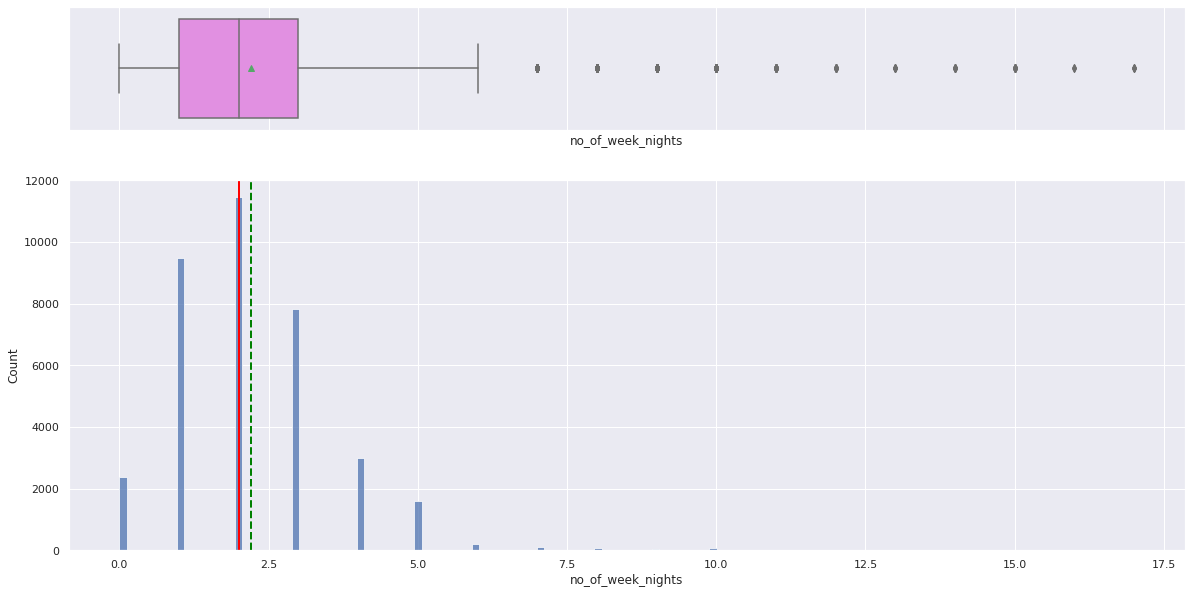

In [19]:
histogram_boxplot(hotel, "no_of_week_nights")

#### Observations
* Since the mean of `no_of_week_nights is 2.2`, it means that `on an average the guests stayed in the hotel for 2 nights during the week` (Monday to Friday). The median is 2, indicating a right-skewed distribution.
* The number of nights the guest stayed in the hotel during the week have a range from 0 to 17. The third quartile (75 percent) is 3, while the maximum week nights stayed are 17, justifying the outliers on the higher end.
* The mode of the distribution is 2, suggesting that `maximum number of guests have booked 2 week nights`.

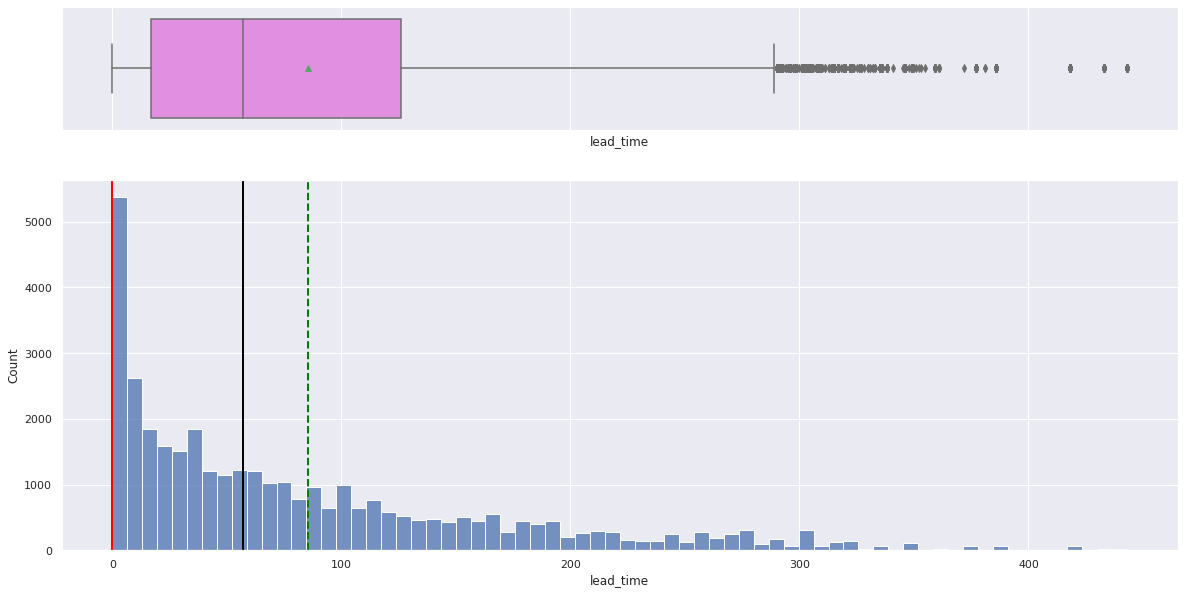

In [20]:
histogram_boxplot(hotel, "lead_time")

In [21]:
hotel.lead_time.value_counts()

0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64

#### Observations
* On an average, `the time between the date of booking and the arrival date (lead time) is 85 days`. The median (50th percentile) is 57 days, indicating a right-skewed distribution.
* The lead time ranged from 0 to 443 days, with the mode being 0 (Count = 1297), indicating that `maximum number of bookings were last minute`, i.e., they were made on the same date as the arrival date.
* There is a huge difference in the 75th percentile (126 days) and maximum lead time (443 days), justifying the outliers on the higher end.

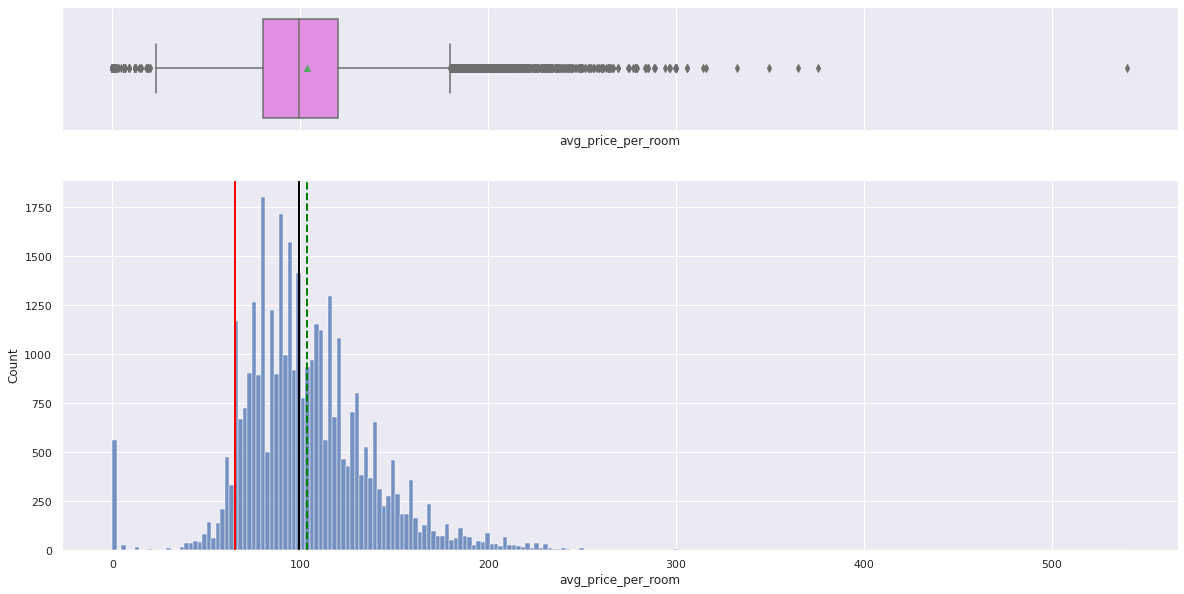

In [22]:
histogram_boxplot(hotel, "avg_price_per_room")

#### Observations
* The `average price per day is 103 euros`. The median is 99 euros, which is close to the mean.
* The average price per day ranged from 0 to 540 euros, with the mode being around 65 euros, indicating that for `maximum bookings, the avg_price_per_day was around 65 euros`, i.e., considering a mean price of 103 euros, majority of guests went for low-priced rooms. 
* There's a large difference between the 75th percentile (120 euros) and maximum value (540) of avr_price_per_room, indicating the presence of room types having very high per day room price.
* There is presence of outliers at either end, which calls for `further exploration`.

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=hotel,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

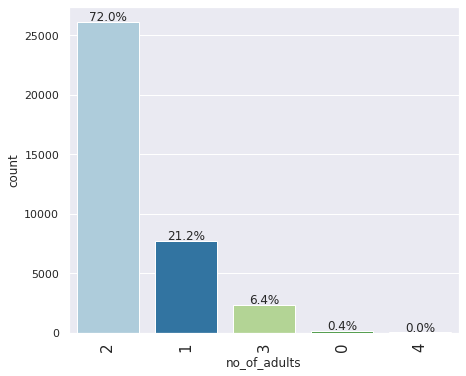

In [24]:
labeled_barplot(hotel, "no_of_adults")

In [25]:
hotel.no_of_adults.value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

#### Observations
* `72% of the booking were made for 2 adults`, followed by 21% where the room was booked for a single adult. 
* However, `139 bookings were made where the number of adults were 0`, indicating that these were fresh bookings made by adults where a room was booked solely for children.
* Very few, only 16 bookings (out of 36275) were made for 4 adults. 

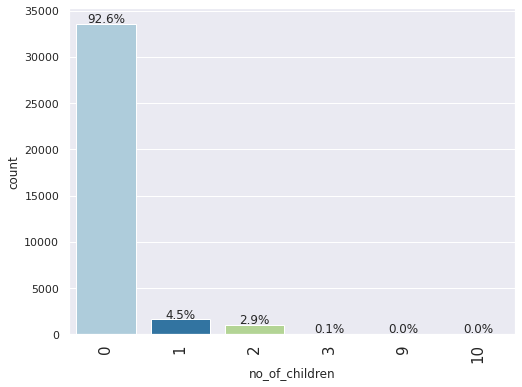

In [26]:
labeled_barplot(hotel, "no_of_children")

In [27]:
hotel.no_of_children.value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

#### Observations
* Close to `93% of the bookings were made by adult(s) who were not accompanied by children`.
* Considering this together with adult bookings, it appears that `majority of bookings were made for individuals, couples/two adults and small groups/adults with children`, since:
    - only 6% (2317 bookings for 3 adults and 16 bookings for 4 adults) of adult bookings were made for groups larger than 2 adults.
    - only 7% (1618 bookings for 1 child, 1058 bookings for 2 children, 19 bookings for 3 children, 2 bookings for 9 children and 1 booking for 10 children) of bookings for children were made by adults accompanied by children, whereas 93% were made by adult(s) who were not accompanied by children.

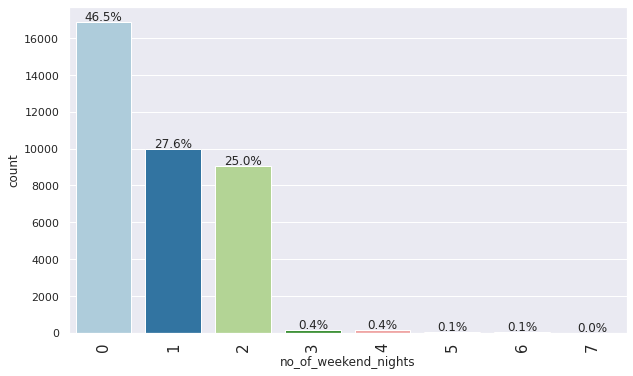

In [28]:
labeled_barplot(hotel, "no_of_weekend_nights")

In [29]:
hotel.no_of_weekend_nights.value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

#### Observations
* 46.5% of the booking were not made for weekend nights (Saturday or Sunday), indicating that `majoring of the guests booked week nights instead`.
* The number of nights the guest stayed in the hotel during the weekend have a range from 0 to 7. The third quartile (75 percent) is 2, while the maximum week nights stayed are 7, justifying the outliers on the higher end.
* The mode of the distribution is 0, suggesting that `maximum number of guests have booked 0 weekend nights`.

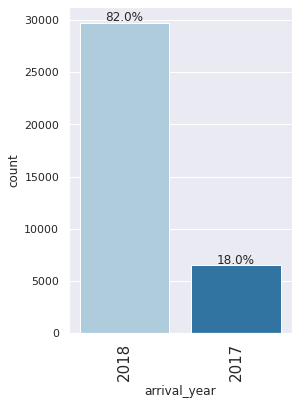

In [30]:
labeled_barplot(hotel, "arrival_year")

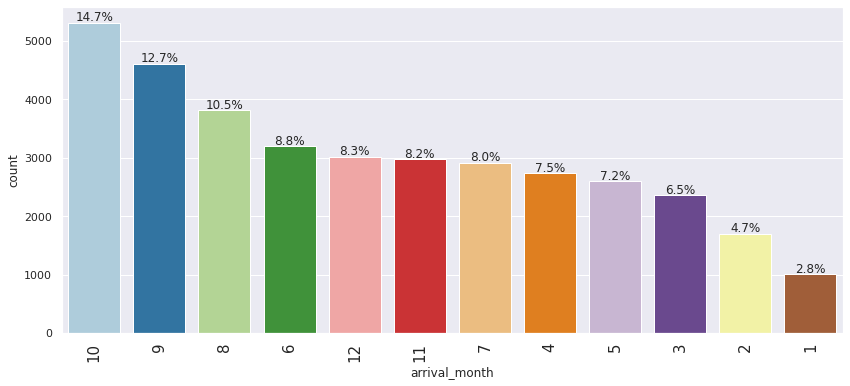

In [31]:
labeled_barplot(hotel, "arrival_month")

In [32]:
yearm = hotel.groupby("arrival_year")["arrival_month"].value_counts()
yearm

arrival_year  arrival_month
2017          10               1913
              9                1649
              8                1014
              12                928
              11                647
              7                 363
2018          10               3404
              6                3203
              9                2962
              8                2799
              4                2736
              5                2598
              7                2557
              3                2358
              11               2333
              12               2093
              2                1704
              1                1014
Name: arrival_month, dtype: int64

#### Observations
* From the bar chart for arrival_year, it appears that the `maximum bookings (82%) were made by guests in 2018`.
* The bar chart for arrival_month looks at 2017 & 2018 together. `October appears to be the busiest month`. It indicates that the maximum, i.e. about 15% of the bookings were made for the month of October, followed by 13% for September, 10.5% for August, 8.8% for June and 8.3.5 for December.
* However, after a closer look, it is evident that the above conclusion requires further exploration as for `2017, the data only pertains to bookings for the months of July-December, whereas for 2018, it includes bookings from January to December`.

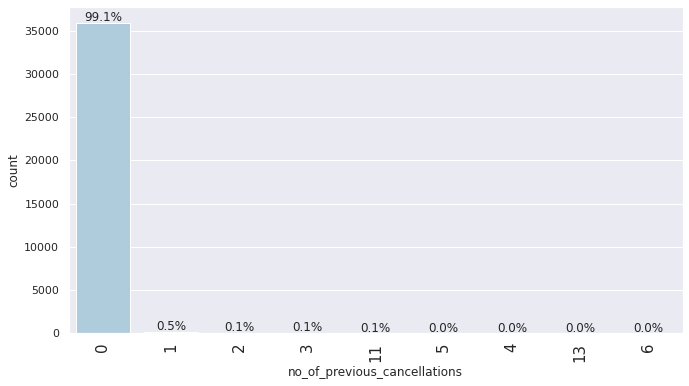

In [33]:
labeled_barplot(hotel, "no_of_previous_cancellations")

In [34]:
hotel.no_of_previous_cancellations.value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

#### Observations
* 99% of the bookings made did not have any prior cancellations.

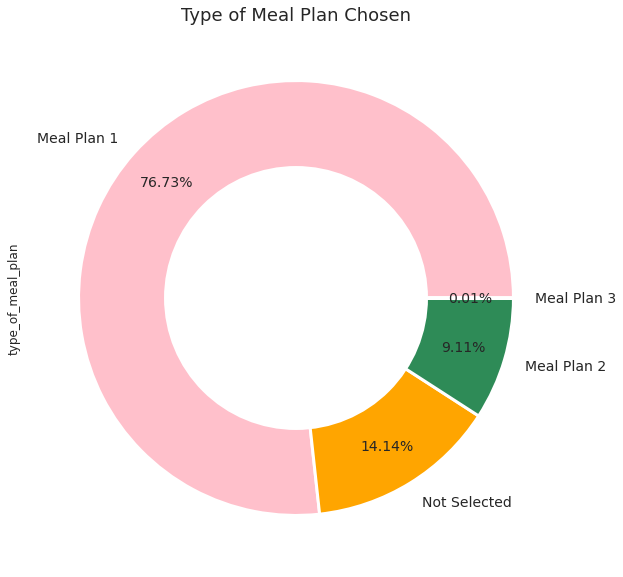

In [35]:
# Creating a donut chart for Type of Meal Plan

plt.title("Type of Meal Plan Chosen", fontsize=18)  # Adding title to the donut chart
hotel["type_of_meal_plan"].value_counts().plot(
    kind="pie",
    colors=["pink", "orange", "seagreen", "lightblue"],
    wedgeprops={"linewidth": 3},
    textprops={"fontsize": 14},
    figsize=(10, 10),
    autopct="%0.2f%%",
    pctdistance=0.8,
)
# Creating the main pie-chart with different parameters
centre_circle = plt.Circle(
    (0, 0), radius=0.6, linewidth=3, facecolor="white"
)  # Creating a smaller center circle
fig = plt.gcf()  # Fetching the current figure
fig.gca().add_artist(centre_circle)
# Adding the center circle to the pie-chart and printing the result

In [36]:
hotel.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

#### Observations
* Majority of the bookings had guests preferring `Meal Plan 1 (77%)`.
* Only 5 bookings preferred Meal Plan 3.

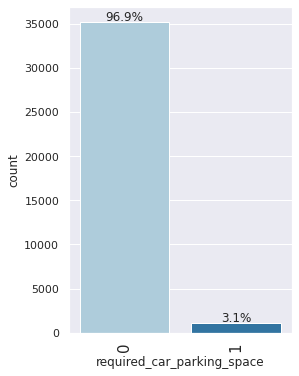

In [37]:
labeled_barplot(hotel, "required_car_parking_space")

#### Observations
* Almost 97% of the bookings did not require a car parking space, implying guests  commuted using other modes of transport.

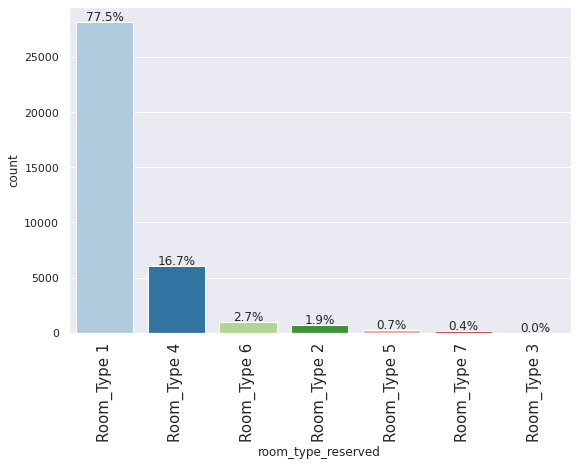

In [38]:
labeled_barplot(hotel, "room_type_reserved")

#### Observations
* Majority (77.5%) of the bookings were made for Room_Type 1, indicating that `Room Type 1 is the preferred choice of most guests` and makes the most revenue for INN Hotels.
* This was followed by Room_Type 4 (17%), and later by Room_Type 6 (3%) and Room_Type 2 (2%).

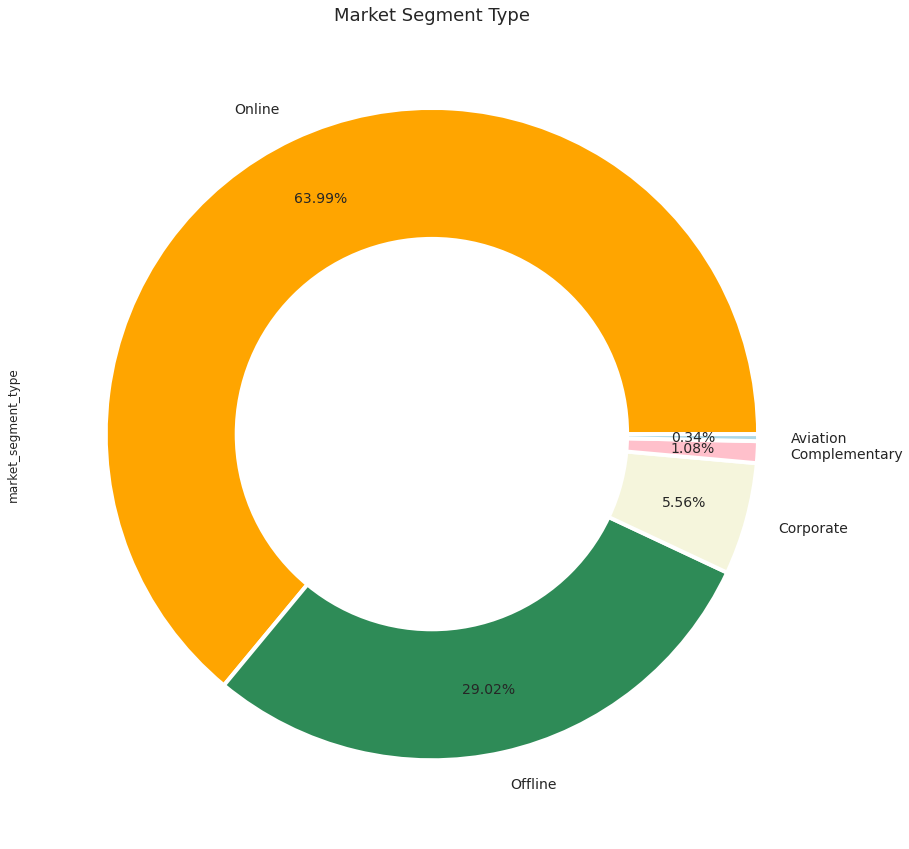

In [39]:
# Creating a donut chart for Market Segment Type

plt.title("Market Segment Type", fontsize=18)  # Adding title to the donut chart
hotel["market_segment_type"].value_counts().plot(
    kind="pie",
    colors=["orange", "seagreen", "beige", "pink", "lightblue"],
    wedgeprops={"linewidth": 4},
    textprops={"fontsize": 14},
    figsize=(15, 15),
    autopct="%0.2f%%",
    pctdistance=0.8,
)
# Creating the main pie-chart with different parameters
centre_circle = plt.Circle(
    (0, 0), radius=0.6, linewidth=3, facecolor="white"
)  # Creating a smaller center circle
fig = plt.gcf()  # Fetching the current figure
fig.gca().add_artist(centre_circle)
# Adding the center circle to the pie-chart and printing the result

#### Observations
* `Majority of the bookings came from the online segment (64%)`.
* Next type was the `offline market segment, which formed close to 30%` of all the bookings made.
* `5.6% of the booking were made in the corporate segment`, where the room rates are usually less than the normal amount.
* There were also some `complimentary bookings made (1.1%)`, probably a customer acquisition strategy by INN hotels.

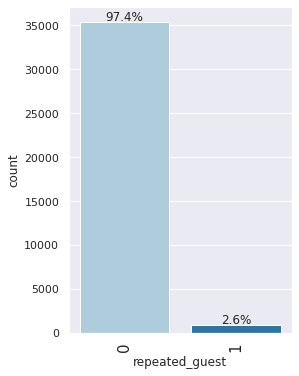

In [40]:
labeled_barplot(hotel, "repeated_guest")

In [41]:
hotel.repeated_guest.value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

#### Observations
* `Majority of the guests (>97%) are new customers` of the hotel.
* A negligible percentage (2.6%) pertains to repeated guests.

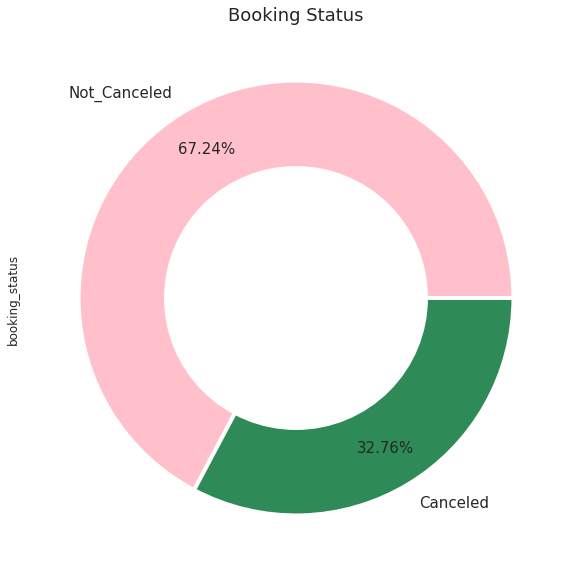

In [42]:
# Creating a donut chart for Booking Status (Target Variable)

plt.title("Booking Status", fontsize=18)  # Adding title to the donut chart
hotel["booking_status"].value_counts().plot(
    kind="pie",
    colors=["pink", "seagreen"],
    wedgeprops={"linewidth": 4},
    textprops={"fontsize": 15},
    figsize=(10, 10),
    autopct="%0.2f%%",
    pctdistance=0.8,
)
# Creating the main pie-chart with different parameters
centre_circle = plt.Circle(
    (0, 0), radius=0.6, linewidth=3, facecolor="white"
)  # Creating a smaller center circle
fig = plt.gcf()  # Fetching the current figure
fig.gca().add_artist(centre_circle)
# Adding the center circle to the pie-chart and printing the result

#### Observations
* `67%` of the booking were `Not_Canceled`. 
* However, the remaining `33% which were cancelations` were a cause of concern for the hotel.

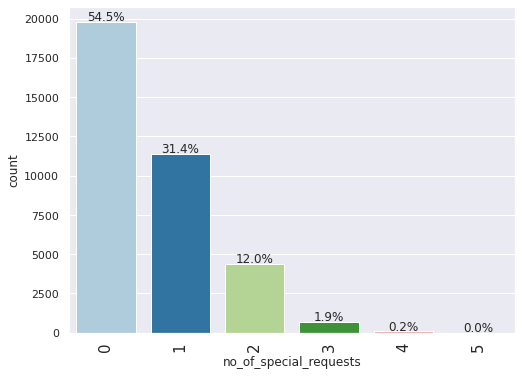

In [43]:
labeled_barplot(hotel, "no_of_special_requests")

#### Observations
* The mean, median and mode of the above distribution for `no_of_special_requests is close to 0` (Count = 19777). This means that the `majority (55%) of guests did not make any special requests` along with their booking.
* Around 30% of the bookings were accompanied by one special request, while 12% were accompanied by two special requests.

### Bivariate and Multivariate Analysis

no_of_adults      0     1      2     3   4    All
booking_status                                   
Canceled         44  1856   9119   863   3  11885
Not_Canceled     95  5839  16989  1454  13  24390
All             139  7695  26108  2317  16  36275
------------------------------------------------------------------------------------------------------------------------
no_of_children      0     1     2   3  9  10    All
booking_status                                     
Canceled        10882   540   457   5  1   0  11885
Not_Canceled    22695  1078   601  14  1   1  24390
All             33577  1618  1058  19  2   1  36275
------------------------------------------------------------------------------------------------------------------------


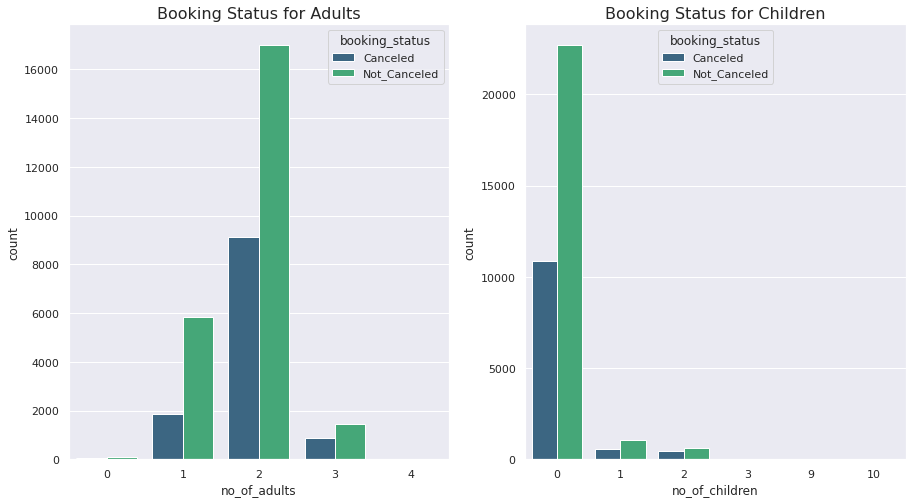

In [44]:
ab = pd.crosstab(
    index=hotel["booking_status"], columns=hotel["no_of_adults"], margins=True
)
print(ab)  # Cross-tabulating by booking status and number of adults
print("-" * 120)
cb = pd.crosstab(
    index=hotel["booking_status"], columns=hotel["no_of_children"], margins=True
)
print(cb)  # Cross-tabulating by booking status and number of children
print("-" * 120)


# Booking status for adults and children
plt.figure(figsize=(15, 8))
plt.xlabel("xlabel", fontsize=16)  # Setting x-axis label font size
plt.ylabel("ylabel", fontsize=16)  # Setting y-axis label font size
plt.xticks(fontsize=14)  # Setting x-axis font size
plt.yticks(fontsize=14)  # Setting y-axis font size

plt.subplot(1, 2, 1)
sns.countplot(
    data=hotel, x="no_of_adults", hue="booking_status", palette="viridis"
)  # Creating countplot of Booking status for adults
plt.title("Booking Status for Adults", fontsize=16)  # Setting plot title

plt.subplot(1, 2, 2)
sns.countplot(
    data=hotel, x="no_of_children", hue="booking_status", palette="viridis"
)  # Creating countplot of Booking status for children
plt.title("Booking Status for Children", fontsize=16)  # Setting plot title
plt.show()

#### Observations
* Non-cancellations were higher than cancellations for both adults as well as children.

no_of_weekend_nights      0     1     2    3    4   5   6  7    All
booking_status                                                     
Canceled               5093  3432  3157   74   83  29  16  1  11885
Not_Canceled          11779  6563  5914   79   46   5   4  0  24390
All                   16872  9995  9071  153  129  34  20  1  36275
------------------------------------------------------------------------------------------------------------------------
no_of_week_nights     0     1      2     3     4     5    6    7   8   9  10  \
booking_status                                                                 
Canceled            679  2572   3997  2574  1143   632   88   52  32  21  53   
Not_Canceled       1708  6916   7447  5265  1847   982  101   61  30  13   9   
All                2387  9488  11444  7839  2990  1614  189  113  62  34  62   

no_of_week_nights  11  12  13  14  15  16  17    All  
booking_status                                        
Canceled           14   7   

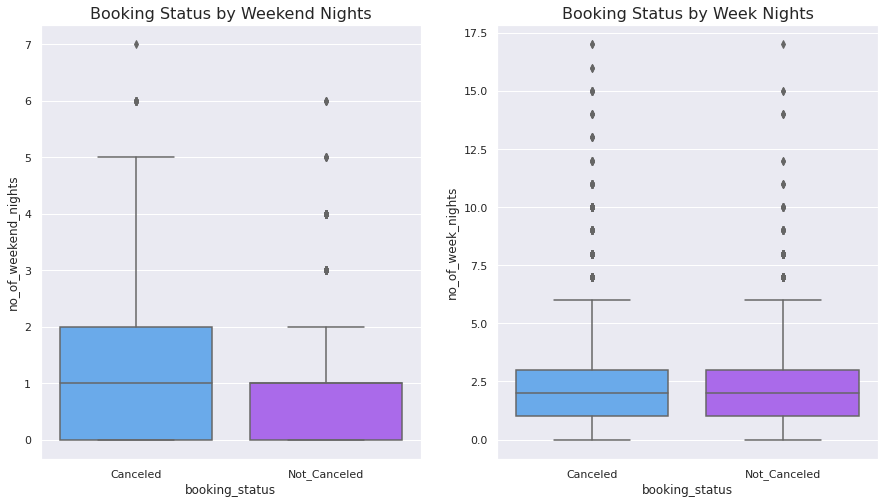

In [45]:
wdb = pd.crosstab(
    index=hotel["booking_status"], columns=hotel["no_of_weekend_nights"], margins=True
)
print(wdb)  # Cross-tabulating by booking status and number of weekend nights
print("-" * 120)
wb = pd.crosstab(
    index=hotel["booking_status"], columns=hotel["no_of_week_nights"], margins=True
)
print(wb)  # Cross-tabulating by booking status and number of week nights
print("-" * 120)


# Booking status by number of weekend and week nights
plt.figure(figsize=(15, 8))
plt.xlabel("xlabel", fontsize=16)  # Setting x-axis label font size
plt.ylabel("ylabel", fontsize=16)  # Setting y-axis label font size
plt.xticks(fontsize=14)  # Setting x-axis font size
plt.yticks(fontsize=14)  # Setting y-axis font size

plt.subplot(1, 2, 1)
sns.boxplot(
    data=hotel, x="booking_status", y="no_of_weekend_nights", palette="cool"
)  # Creating boxplot of Booking status for weekend nights
plt.title("Booking Status by Weekend Nights", fontsize=16)  # Setting plot title

plt.subplot(1, 2, 2)
sns.boxplot(
    data=hotel, x="booking_status", y="no_of_week_nights", palette="cool"
)  # Creating boxplot of Booking status for week nights
plt.title("Booking Status by Week Nights", fontsize=16)  # Setting plot title
plt.show()

#### Observations
* For weekend nights, for the cancelled bookings, the median is 1. The third quartile is 2, indicating that `weekend night bookings for more than 2 nights are cancelled by guests`.
* As the number of booked nights increased, so did the cancellations.
* The `cancellations and non-cancellations were somewhat similar for week nights booked`, with outliers at the higher end.

lead_time        0    1    2    3    4    5    6    7    8    9    ...  355  \
booking_status                                                     ...        
Canceled          68  110   38   57   62   76   54   49   53   48  ...    1   
Not_Canceled    1229  968  605  573  566  501  465  380  383  284  ...    0   

lead_time       359  361  372  377  381  386  418  433  443  
booking_status                                               
Canceled          4    5    1   63    2   63   60   20   22  
Not_Canceled     12    0    0    6    0    6    0    0    0  

[2 rows x 352 columns]
------------------------------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Booking Status by Lead Time')

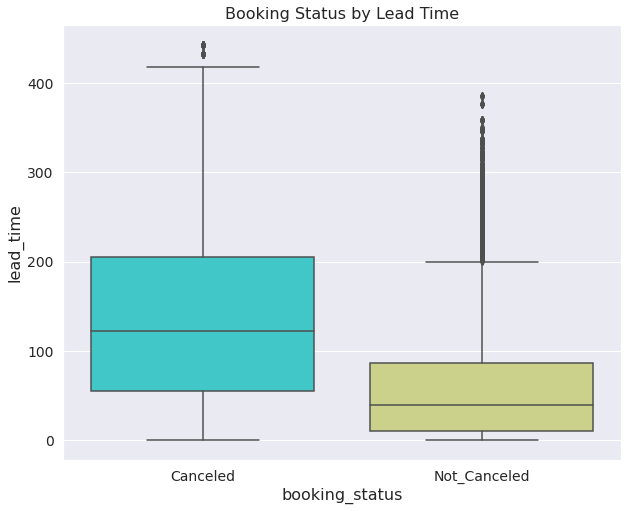

In [46]:
lb = pd.crosstab(index=hotel["booking_status"], columns=[hotel["lead_time"]])
print(lb)  # Cross-tabulating by booking status and lead_time
print("-" * 120)

# Booking status by lead time

plt.figure(figsize=(10, 8))
plt.xlabel("xlabel", fontsize=16)  # Setting x-axis label font size
plt.ylabel("ylabel", fontsize=16)  # Setting y-axis label font size
plt.xticks(fontsize=14)  # Setting x-axis font size
plt.yticks(fontsize=14)  # Setting y-axis font size
sns.boxplot(data=hotel, x="booking_status", y="lead_time", palette="rainbow")
# Creating boxplot for booking status by lead time
plt.title("Booking Status by Lead Time", fontsize=16)
# Setting plot title

#### Observations
* Higher the lead time, more were the cancellations.

In [47]:
ym = pd.crosstab(
    index=hotel["booking_status"],
    columns=[hotel["arrival_year"], hotel["arrival_month"]],
)
ym  # Cross-tabulating by booking status, arrival year and arrival month

arrival_year   2017                            2018                          \
arrival_month    7    8     9     10   11   12   1     2     3     4     5    
booking_status                                                                
Canceled        243  185   182   302   27   22   24   430   700   995   948   
Not_Canceled    120  829  1467  1611  620  906  990  1274  1658  1741  1650   

arrival_year                                              
arrival_month     6     7     8     9     10    11    12  
booking_status                                            
Canceled        1291  1071  1303  1356  1578   848   380  
Not_Canceled    1912  1486  1496  1606  1826  1485  1713

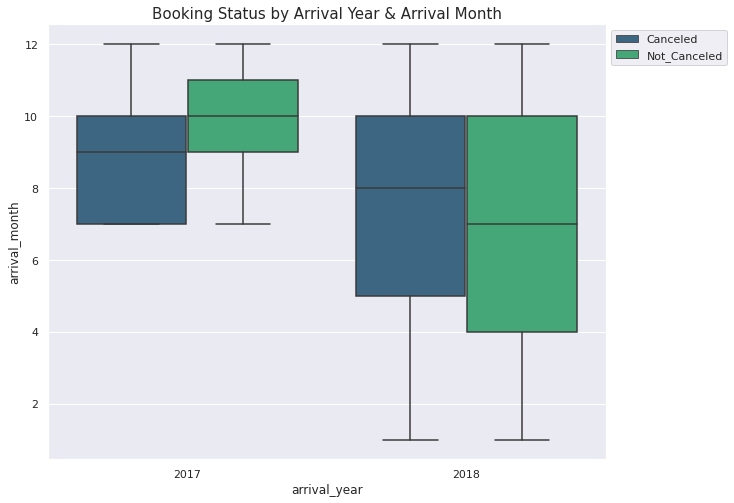

In [48]:
plt.figure(figsize=(10, 8))
sns.boxplot(
    data=hotel,
    x="arrival_year",
    y="arrival_month",
    hue="booking_status",
    palette="viridis",
)  # Creating boxplot of Booking status by arrival year and arrival month
plt.title(
    "Booking Status by Arrival Year & Arrival Month", fontsize=15
)  # Setting plot title
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

#### Observations
* For 2017, the booking data is available from July onwards. Most of the bookings were made between July and November, with `bookings for November not being cancelled` by the guests.
* W.r.t. 2018, majority bookings came in for months of April through October, particularly with `bookings for April not being cancelled` by the guests.

no_of_previous_cancellations      0    1   2   3   4   5  6  11  13    All
booking_status                                                            
Canceled                      11869   11   0   1   0   0  0   0   4  11885
Not_Canceled                  24068  187  46  42  10  11  1  25   0  24390
All                           35937  198  46  43  10  11  1  25   4  36275
------------------------------------------------------------------------------------------------------------------------
no_of_previous_bookings_not_canceled      0    1    2   3   4   5   6   7   8  \
booking_status                                                                  
Canceled                              11878    4    0   0   1   0   1   0   0   
Not_Canceled                          23585  224  112  80  64  60  35  24  23   
All                                   35463  228  112  80  65  60  36  24  23   

no_of_previous_bookings_not_canceled   9  ...  50  51  52  53  54  55  56  57  \
booking_status   

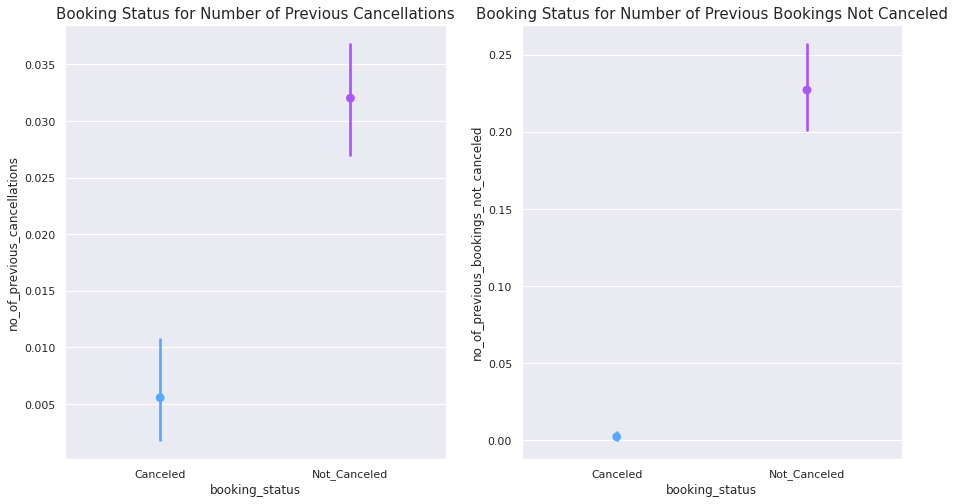

In [49]:
pb = pd.crosstab(
    index=hotel["booking_status"],
    columns=hotel["no_of_previous_cancellations"],
    margins=True,
)
print(pb)  # Cross-tabulating by booking status and number of previous cancellations
print("-" * 120)
pnb = pd.crosstab(
    index=hotel["booking_status"],
    columns=hotel["no_of_previous_bookings_not_canceled"],
    margins=True,
)
print(
    pnb
)  # Cross-tabulating by booking status and number of previous bookings not canceled
print("-" * 120)


# Booking status by number of previous cancellations and number of previous bookings not canceled
plt.figure(figsize=(15, 8))
plt.xlabel("xlabel", fontsize=16)  # Setting x-axis label font size
plt.ylabel("ylabel", fontsize=16)  # Setting y-axis label font size
plt.xticks(fontsize=14)  # Setting x-axis font size
plt.yticks(fontsize=14)  # Setting y-axis font size

plt.subplot(1, 2, 1)
sns.pointplot(
    data=hotel, x="booking_status", y="no_of_previous_cancellations", palette="cool"
)  # Creating pointplot of Booking status for number of previous cancellations
plt.title(
    "Booking Status for Number of Previous Cancellations", fontsize=15
)  # Setting plot title

plt.subplot(1, 2, 2)
sns.pointplot(
    data=hotel,
    x="booking_status",
    y="no_of_previous_bookings_not_canceled",
    palette="cool",
)  # Creating pointplot of Booking status for number of previous bookings not canceled
plt.title(
    "Booking Status for Number of Previous Bookings Not Canceled", fontsize=15
)  # Setting plot title
plt.show()

#### Observations
* For both number of previous cancellations and number of previous bookings not canceled, the `booking status was not_canceled`, as is evident from the plot above.

In [50]:
# Booking status by average price per room

avg = hotel.groupby(["booking_status"])["avg_price_per_room"].mean()
avg

booking_status
Canceled       110.58997
Not_Canceled    99.93141
Name: avg_price_per_room, dtype: float64

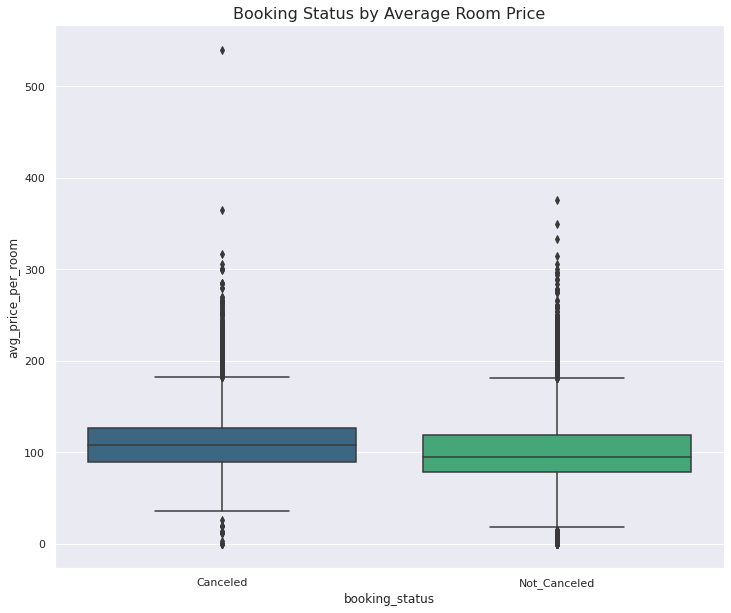

In [51]:
plt.figure(figsize=(12, 10))
sns.boxplot(
    data=hotel,
    x="booking_status",
    y="avg_price_per_room",
    palette="viridis",
)  # Creating boxplot of Booking status by average price per room
plt.title("Booking Status by Average Room Price", fontsize=16)  # Setting plot title

plt.show()

#### Observations
* As the `average price of the room increase, the cancellations also increase`.
* There are outliers at each end of the plots, however, for the most extreme outlier at the higher end - related to a `room priced at 540 euros, its booking was cancelled`.

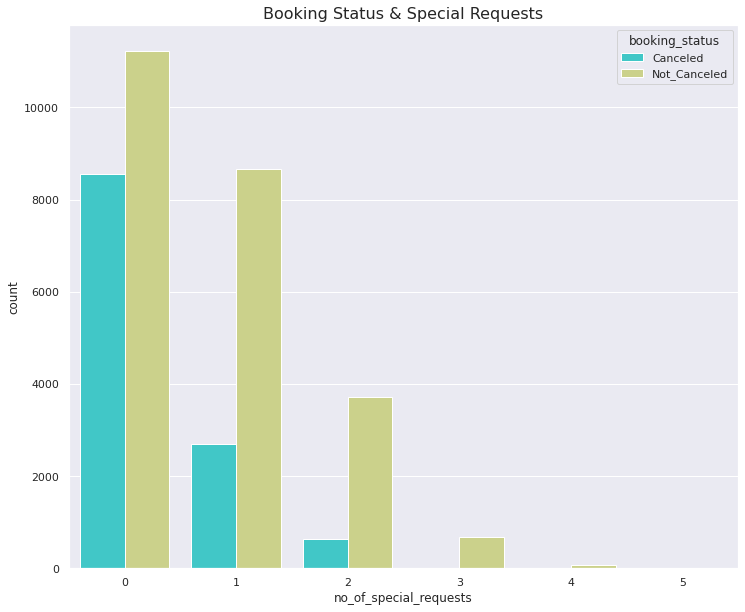

In [52]:
# Booking status and number of special requests by guests

plt.figure(figsize=(12, 10))
sns.countplot(
    data=hotel,
    x="no_of_special_requests",
    hue="booking_status",
    palette="rainbow",
)  # Creating countplot of Booking status & Special Requests
plt.title("Booking Status & Special Requests", fontsize=16)  # Setting plot title

plt.show()

#### Observations
* Bookings where special requests are made by guests are usually not cancelled.
* In comparison, bookings where no special requests (0 in above plot) are made by guests are more prone to getting cancelled.

type_of_meal_plan  Meal Plan 1  Meal Plan 2  Meal Plan 3  Not Selected    All
booking_status                                                               
Canceled                  8679         1506            1          1699  11885
Not_Canceled             19156         1799            4          3431  24390
All                      27835         3305            5          5130  36275
------------------------------------------------------------------------------------------------------------------------
room_type_reserved  Room_Type 1  Room_Type 2  Room_Type 3  Room_Type 4  \
booking_status                                                           
Canceled                   9072          228            2         2069   
Not_Canceled              19058          464            5         3988   
All                       28130          692            7         6057   

room_type_reserved  Room_Type 5  Room_Type 6  Room_Type 7    All  
booking_status                                     

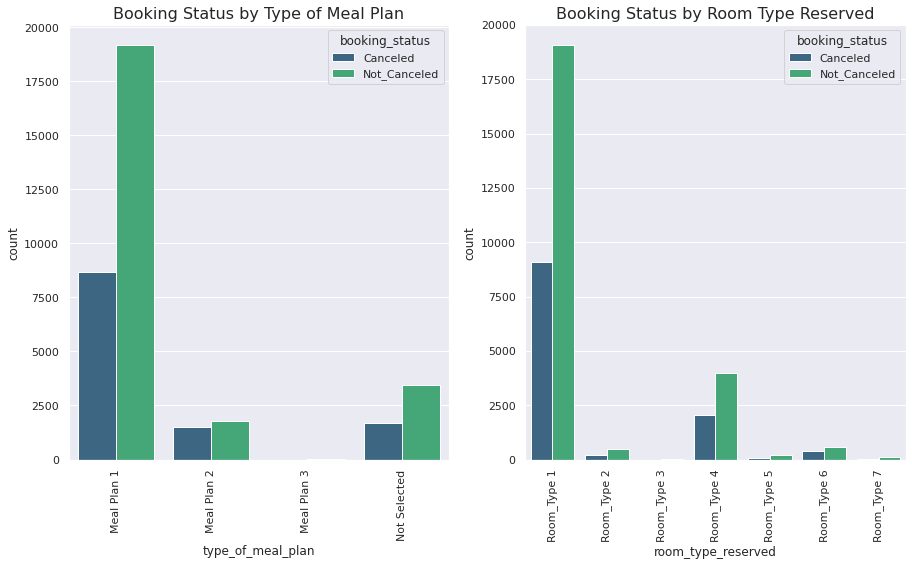

In [53]:
mpb = pd.crosstab(
    index=hotel["booking_status"], columns=hotel["type_of_meal_plan"], margins=True
)
print(mpb)  # Cross-tabulating by booking status and type of meal plan
print("-" * 120)
rtb = pd.crosstab(
    index=hotel["booking_status"], columns=hotel["room_type_reserved"], margins=True
)
print(rtb)  # Cross-tabulating by booking status and room type reserved
print("-" * 120)


# Booking status by type of meal plan and room type reserved
plt.figure(figsize=(15, 8))
plt.xlabel("xlabel", fontsize=16)  # Setting x-axis label font size
plt.ylabel("ylabel", fontsize=16)  # Setting y-axis label font size
plt.xticks(fontsize=14)  # Setting x-axis font size
plt.yticks(fontsize=14)  # Setting y-axis font size

plt.subplot(1, 2, 1)
sns.countplot(
    data=hotel, x="type_of_meal_plan", hue="booking_status", palette="viridis"
)  # Creating countplot of Booking status for type of meal plan
plt.title("Booking Status by Type of Meal Plan", fontsize=16)  # Setting plot title
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(
    data=hotel, x="room_type_reserved", hue="booking_status", palette="viridis"
)  # Creating countplot of Booking status for room type reserved
plt.title("Booking Status by Room Type Reserved", fontsize=16)  # Setting plot title
plt.xticks(rotation=90)
plt.show()

#### Observations
* `Bookings where Meal Plan 1 was chosen had 50% lesser chances of getting cancelled` as compared to those where Meal Plan 2 was chosen or no meal plan was selected.
* `Bookings for Room_Type 1 were the maximum and had 50% lesser chances of getting cancelled` as compared to bookings for other room types.

required_car_parking_space      0     1    All
booking_status                                
Canceled                    11771   114  11885
Not_Canceled                23380  1010  24390
All                         35151  1124  36275
------------------------------------------------------------------------------------------------------------------------
repeated_guest      0    1    All
booking_status                   
Canceled        11869   16  11885
Not_Canceled    23476  914  24390
All             35345  930  36275
------------------------------------------------------------------------------------------------------------------------


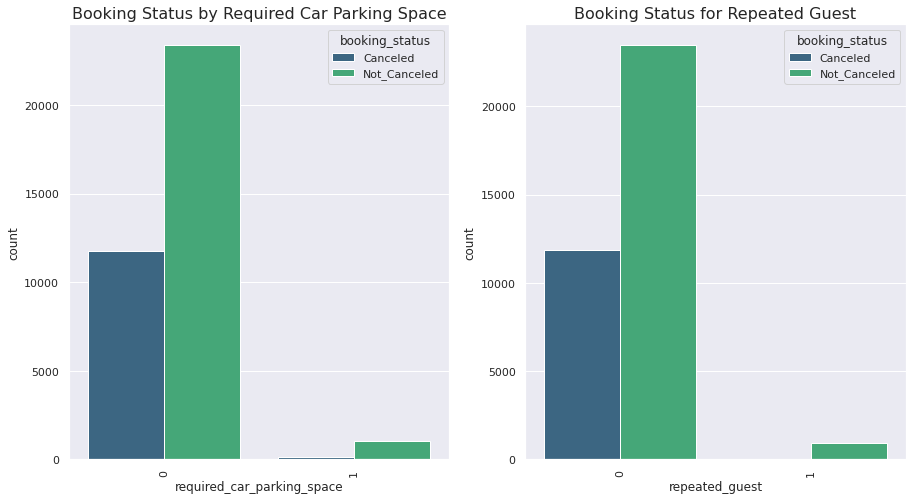

In [54]:
cpsb = pd.crosstab(
    index=hotel["booking_status"],
    columns=hotel["required_car_parking_space"],
    margins=True,
)
print(cpsb)  # Cross-tabulating by booking status and required car parking space
print("-" * 120)
rgb = pd.crosstab(
    index=hotel["booking_status"], columns=hotel["repeated_guest"], margins=True
)
print(rgb)  # Cross-tabulating by booking status and repeated guest
print("-" * 120)


# Booking status by required car parking space and repeated guest
plt.figure(figsize=(15, 8))
plt.xlabel("xlabel", fontsize=16)  # Setting x-axis label font size
plt.ylabel("ylabel", fontsize=16)  # Setting y-axis label font size
plt.xticks(fontsize=14)  # Setting x-axis font size
plt.yticks(fontsize=14)  # Setting y-axis font size

plt.subplot(1, 2, 1)
sns.countplot(
    data=hotel, x="required_car_parking_space", hue="booking_status", palette="viridis"
)  # Creating countplot of Booking status for required car parking space
plt.title(
    "Booking Status by Required Car Parking Space", fontsize=16
)  # Setting plot title
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(
    data=hotel, x="repeated_guest", hue="booking_status", palette="viridis"
)  # Creating countplot of Booking status for repeated guest
plt.title("Booking Status for Repeated Guest", fontsize=16)  # Setting plot title
plt.xticks(rotation=90)
plt.show()

#### Observations
* Fewer than 50% of bookings where the guests did not require car parking space, were canceled.
* Again, fewer than 50% of bookings where the bookings were made by new customers, were canceled.
* Only 2% (16 guests out of 930) of repeating guests cancelled their bookings.

In [55]:
hotel.groupby("repeated_guest")["no_of_previous_cancellations"].value_counts()

repeated_guest  no_of_previous_cancellations
0               0                               35345
1               0                                 592
                1                                 198
                2                                  46
                3                                  43
                11                                 25
                5                                  11
                4                                  10
                13                                  4
                6                                   1
Name: no_of_previous_cancellations, dtype: int64

In [56]:
hotel.groupby("repeated_guest")["no_of_previous_bookings_not_canceled"].value_counts()

repeated_guest  no_of_previous_bookings_not_canceled
0               0                                       35345
1               1                                         228
                0                                         118
                2                                         112
                3                                          80
                4                                          65
                5                                          60
                6                                          36
                7                                          24
                8                                          23
                9                                          19
                10                                         19
                11                                         15
                12                                         12
                14                                          9
                1

#### Observations
* There were 35345 new bookings/customers, as these are not our repeated guests
* Out of the repeated guests, number of cancellations were 0 for 118 guests.

booking_status       Canceled  Not_Canceled
market_segment_type                        
Aviation                   37            88
Complementary               0           391
Corporate                 220          1797
Offline                  3153          7375
Online                   8475         14739


Text(0.5, 0, 'booking_status')

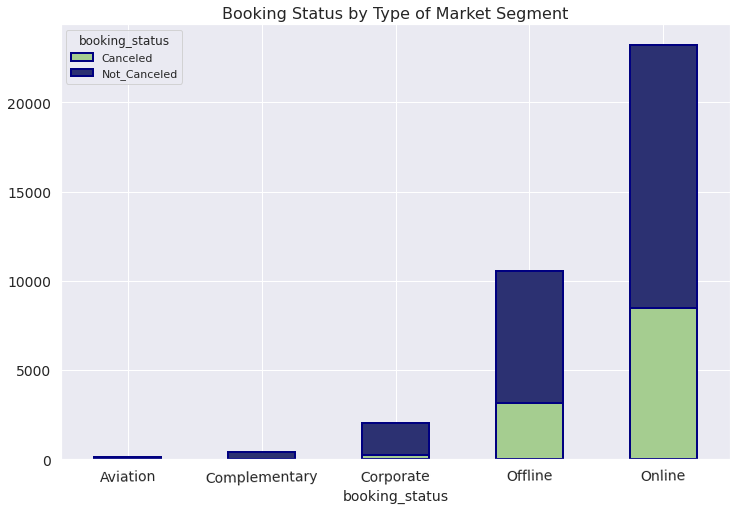

In [57]:
mst = pd.crosstab(index=hotel["market_segment_type"], columns=hotel["booking_status"])
print(mst)  # Cross-tabulating by booking status and type of market segment

# Creating Stacked Bar Chart

mst.plot(
    kind="bar",
    colormap="crest",
    figsize=(12, 8),
    rot=1,
    stacked=True,
    linewidth=2,
    edgecolor="navy",
    fontsize=14,
)
# Creating stacked bar chart for booking status and type of market segment
plt.title("Booking Status by Type of Market Segment", fontsize=16)
# Setting plot title
plt.xlabel("booking_status", fontsize=14)

#### Observations
* Booking non-cancellations are more in all market segments than booking cancellations.
* Around 30% bookings in the aviation market segment, 10% in corporate, 30% of offline and 37% of online bookings were cancelled.
* None of the complimentary bookings were cancelled.

market_segment_type
Aviation        100.70400
Complementary     3.14176
Corporate        82.91174
Offline          91.63268
Online          112.25685
Name: avg_price_per_room, dtype: float64


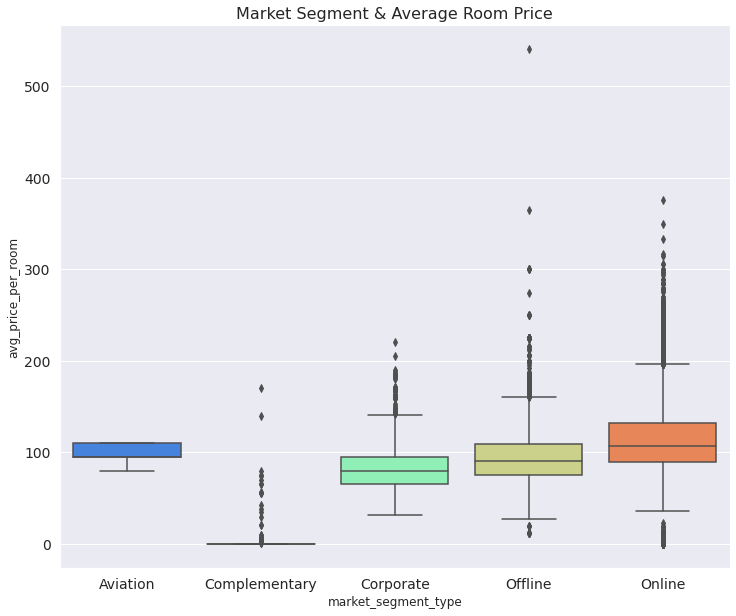

In [58]:
map = hotel.groupby(["market_segment_type"])["avg_price_per_room"].mean()
print(map)  # Grouping by type of market segment and average room price

# Type of market segment and average room price

plt.figure(figsize=(12, 10))
sns.boxplot(
    data=hotel,
    x="market_segment_type",
    y="avg_price_per_room",
    palette="rainbow",
)  # Creating boxplot of market segment and average room price
plt.title("Market Segment & Average Room Price", fontsize=16)  # Setting plot title
plt.xticks(fontsize=14)  # Setting x-axis font size
plt.yticks(fontsize=14)  # Setting y-axis font size
plt.show()

#### Observations
* Online bookings carried the maximum average price per room (112 euros), followed by Aviation (101 euros), then Offline (92 euros) and finally Corporate (83 euros) market segment.
* Offline market segment included the highest priced room type at 540 euros.
* The complementary room type was usually available for free (average = 3 euros).

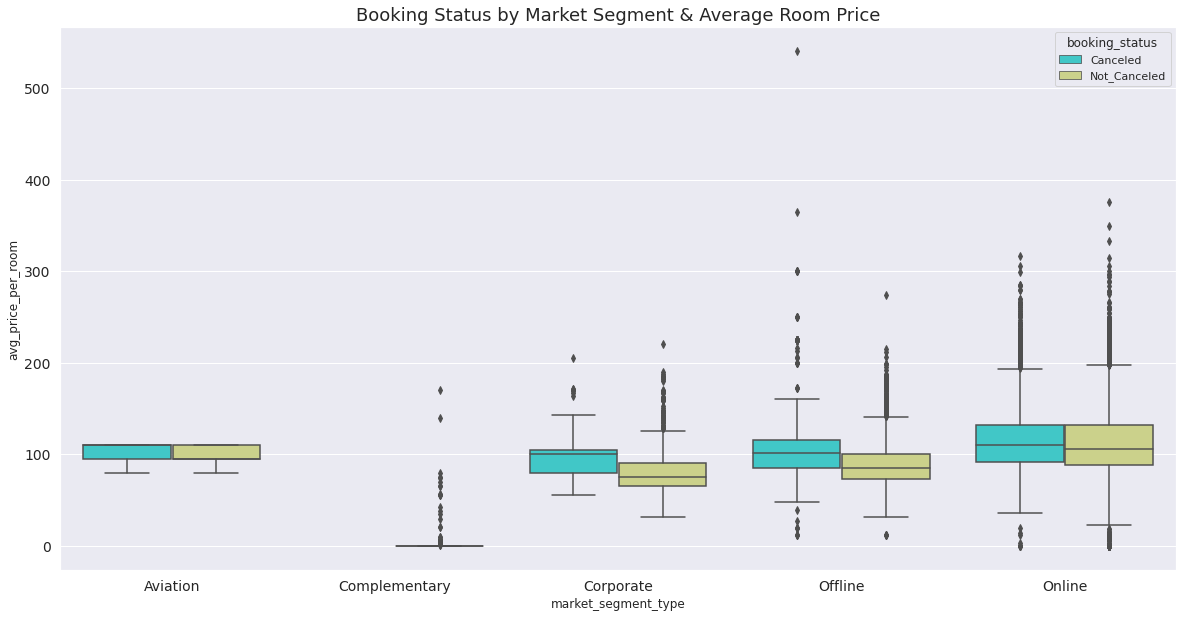

In [59]:
# Booking Status by type of market segment & average room price

plt.figure(figsize=(20, 10))
sns.boxplot(
    data=hotel,
    x="market_segment_type",
    y="avg_price_per_room",
    hue="booking_status",
    palette="rainbow",
)  # Creating boxplot of booking status by market segment and average room price
plt.title(
    "Booking Status by Market Segment & Average Room Price", fontsize=18
)  # Setting plot title
plt.xticks(fontsize=14)  # Setting x-axis font size
plt.yticks(fontsize=14)  # Setting y-axis font size
plt.show()

#### Observations
* Cancellations have been slightly higher for higher priced rooms across all market segments.
* There were almost no cancellations for complementary market segment.

lead_time
0      93.25807
1      99.30737
2      98.96868
3     100.32829
4     101.54538
         ...   
381    74.02500
386   108.94203
418    93.31667
433    70.00000
443    64.54545
Name: avg_price_per_room, Length: 352, dtype: float64


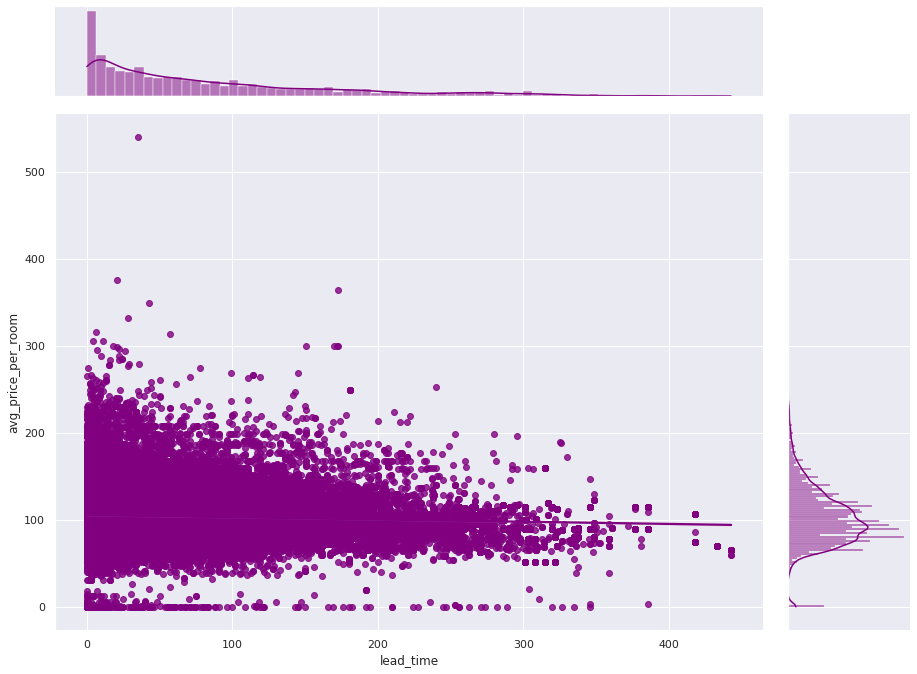

In [60]:
lap = hotel.groupby(["lead_time"])["avg_price_per_room"].mean()
print(lap)  # Grouping by type of lead time and average room price

# Joinplot to explore the relationship between lead time and average room price

sns.jointplot(
    data=hotel, x="lead_time", y="avg_price_per_room", ci=95, kind="reg", color="purple"
)
plt.gcf().set_size_inches(14, 10)

#### Observations
* It can be said that the `average price of the room is lower when the lead time is higher`.

arrival_month   1                                       ...  12              \
lead_time      0   1   2   3   4   5   6   7   8   9    ... 346 348 349 350   
booking_status                                          ...                   
Canceled         0   0   0   0   0   0   0   0   0   0  ...   3   0   2   1   
Not_Canceled    77  80  65  29  51  21  16  15  17  34  ...   0   1   0   0   

arrival_month                           
lead_time      351 352 353 355 372 381  
booking_status                          
Canceled         0   1   1   1   1   2  
Not_Canceled     1   0   0   0   0   0  

[2 rows x 2557 columns]


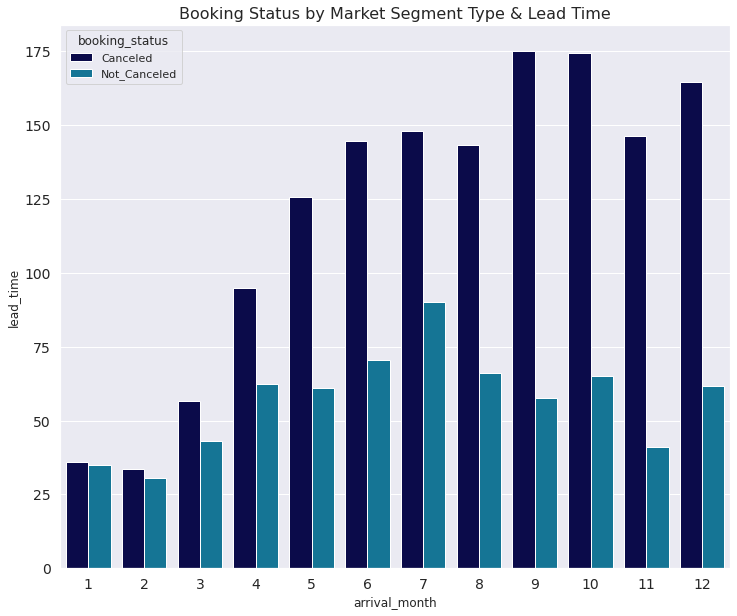

In [61]:
alb = pd.crosstab(
    index=hotel["booking_status"],
    columns=[hotel["arrival_month"], hotel["lead_time"]],
)
print(alb)  # Cross-tabulating by booking status and arrival month & lead time

# Booking Status by arrival month & lead time

plt.figure(figsize=(12, 10))
sns.barplot(
    data=hotel,
    x="arrival_month",
    y="lead_time",
    hue="booking_status",
    palette="ocean",
    ci=False,
)  # Creating boxplot of Booking Status by arrival month & lead time
plt.title(
    "Booking Status by Market Segment Type & Lead Time", fontsize=16
)  # Setting plot title
plt.xticks(fontsize=14)  # Setting x-axis font size
plt.yticks(fontsize=14)  # Setting y-axis font size
plt.show()

#### Observations
* As the lead time increases, the cancellations also increase for almost all months of arrival.
* In contrast to the non-cancellations, cancellations are highest for the month of September.

market_segment_type Aviation                                      ... Online  \
lead_time                0   1   2   3   4   5   6   7   8   9    ...    355   
booking_status                                                    ...          
Canceled                   1   3   3   7   1   6   0   0   0   0  ...      1   
Not_Canceled              10   8  16  12   9  12   4   2   2   1  ...      0   

market_segment_type                                      
lead_time           359 361 372 377 381 386 418 433 443  
booking_status                                           
Canceled              2   5   1  13   2  20  12   6   7  
Not_Canceled          0   0   0   0   0   0   0   0   0  

[2 rows x 821 columns]


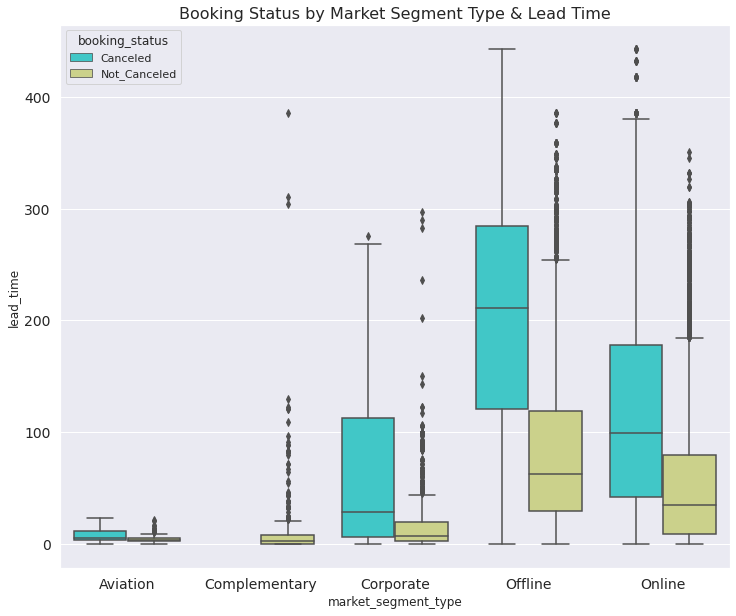

In [62]:
mlb = pd.crosstab(
    index=hotel["booking_status"],
    columns=[hotel["market_segment_type"], hotel["lead_time"]],
)
print(mlb)  # Cross-tabulating by booking status and market segment type & lead time

# Booking Status by market segment type & lead time

plt.figure(figsize=(12, 10))
sns.boxplot(
    data=hotel,
    x="market_segment_type",
    y="lead_time",
    hue="booking_status",
    palette="rainbow",
)  # Creating boxplot of Booking Status by market segment type & lead time
plt.title(
    "Booking Status by Market Segment Type & Lead Time", fontsize=16
)  # Setting plot title
plt.xticks(fontsize=14)  # Setting x-axis font size
plt.yticks(fontsize=14)  # Setting y-axis font size
plt.show()

#### Observations
* Cancellations were higher in almost all market segments when the lead time was higher.
* There were no cancellations in the complementary market segment.
* Offline market segment had the maximum cancellations with higher lead time.

market_segment_type Aviation                                      ... Online  \
lead_time                0   1   2   3   4   5   6   7   8   9    ...    355   
booking_status                                                    ...          
Canceled                   1   3   3   7   1   6   0   0   0   0  ...      1   
Not_Canceled              10   8  16  12   9  12   4   2   2   1  ...      0   

market_segment_type                                      
lead_time           359 361 372 377 381 386 418 433 443  
booking_status                                           
Canceled              2   5   1  13   2  20  12   6   7  
Not_Canceled          0   0   0   0   0   0   0   0   0  

[2 rows x 821 columns]


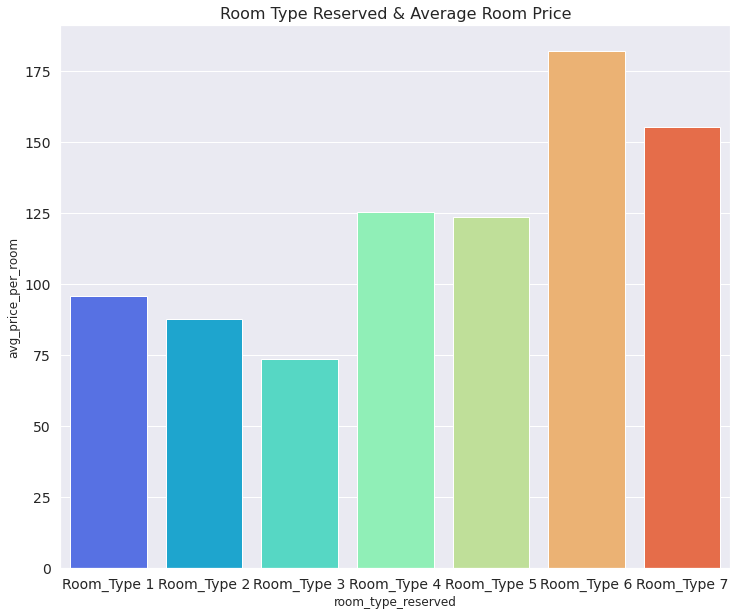

In [63]:
mlb = pd.crosstab(
    index=hotel["booking_status"],
    columns=[hotel["market_segment_type"], hotel["lead_time"]],
)
print(mlb)  # Room type reserved and average room price

plt.figure(figsize=(12, 10))
sns.barplot(
    data=hotel,
    x="room_type_reserved",
    y="avg_price_per_room",
    palette="rainbow",
    ci=False,
)  # Creating barplot of room type reserved and average room price
plt.title("Room Type Reserved & Average Room Price", fontsize=16)  # Setting plot title
plt.xticks(fontsize=14)  # Setting x-axis font size
plt.yticks(fontsize=14)  # Setting y-axis font size
plt.show()

#### Obsevations
* `Room_Type 6 had the highest average price` (182 euros) amongst the room types, followed by Room_Type 7 (155 euros).
* `Room_Type 3 had the lowest average price` at 74 euros. 

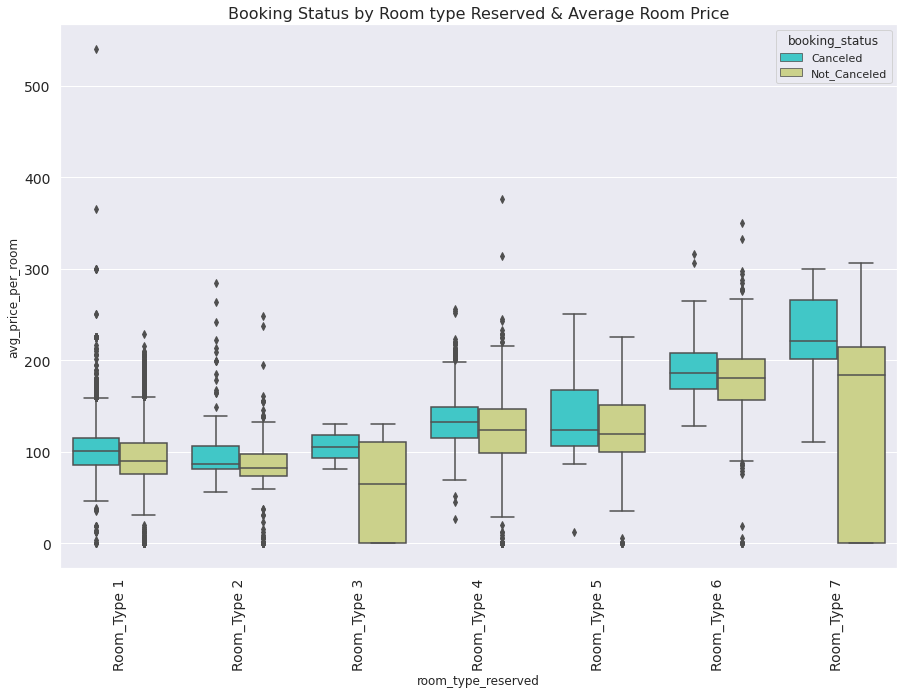

In [64]:
# Booking Status by room type reserved and average room price

plt.figure(figsize=(15, 10))
sns.boxplot(
    data=hotel,
    x="room_type_reserved",
    y="avg_price_per_room",
    hue="booking_status",
    palette="rainbow",
)  # Creating boxplot by booking status and room type reserved & average room price
plt.title(
    "Booking Status by Room type Reserved & Average Room Price", fontsize=16
)  # Setting plot title
plt.xticks(fontsize=14)  # Setting x-axis font size
plt.yticks(fontsize=14)  # Setting y-axis font size
plt.xticks(rotation=90)
plt.show()

#### Observations
* Cancellations were slightly higher for higher price rooms in almost all categories.
* Cancellations were the highest for Room_Type 7 when the average room price was higher.

In [65]:
rtms = pd.crosstab(
    index=hotel["market_segment_type"],
    columns=hotel["room_type_reserved"],
    margins=True,
)
rtms

room_type_reserved,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,All
market_segment_type,,,,,,,,
Aviation,60,0,0,65,0,0,0,125
Complementary,247,20,2,52,17,14,39,391
Corporate,1833,2,1,99,74,3,5,2017
Offline,9747,57,2,613,81,23,5,10528
Online,16243,613,2,5228,93,926,109,23214
All,28130,692,7,6057,265,966,158,36275


#### Observations
* Room type 1 was the most booked room, while Room type 3 was the least booked room.
* Aviation segment booked Room type 1 and 4 only.
* Complementary segment booked the maximum (63%) Room type 1 rooms (247 out of 391).
* Corporate segment booked very few Room type 2, 3, 6 and 7 rooms, while they majorly (91%) booked Room type 1 rooms.
* Very few Room type 3 and 7 rooms were booked by the Offline segment, which again majorly (93%) booked Room type 1 rooms, followed by Room type 4 room (6%).
* Online bookings comprised of 70% Room type 1, 22.5% Room type 4, 4% Room Type 6, 3% Room Type 2 and the remaining (0.5%) Room type 7, 5 and 3 rooms.
* Therefore, the `maximum number (93%) of Room type 1 rooms were booked by the Offline segment`.

<Figure size 1440x720 with 0 Axes>

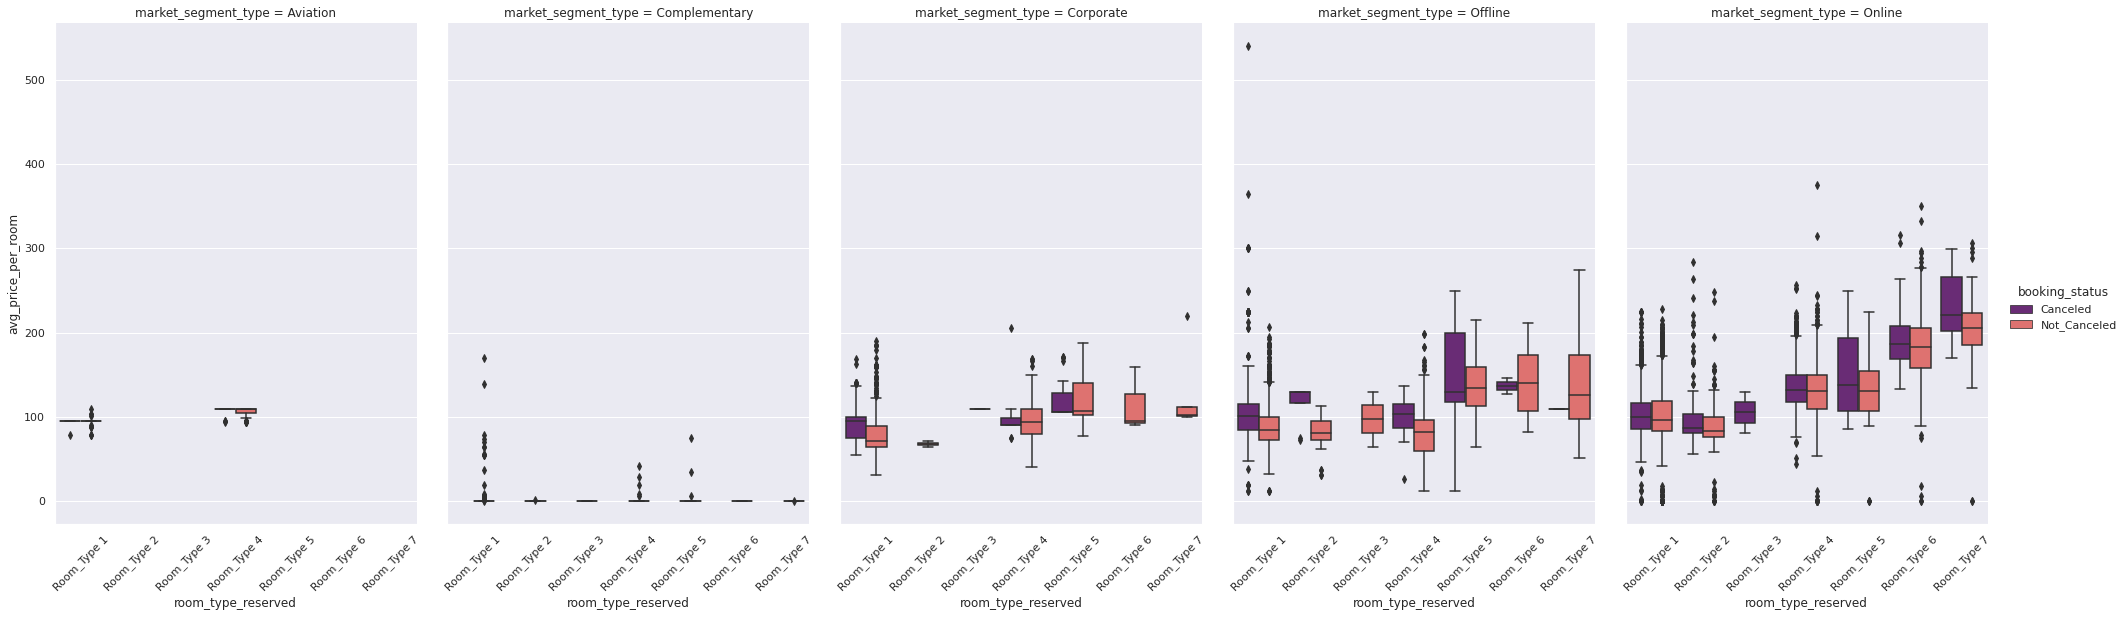

In [66]:
# Creating subplots using catplot

plt.figure(figsize=(20, 10))
chart = sns.catplot(
    data=hotel,
    x="room_type_reserved",
    y="avg_price_per_room",
    col="market_segment_type",
    hue="booking_status",
    palette="magma",
    kind="box",
    height=8,
    aspect=0.7,
    ci=None,
)
chart.set_xticklabels(rotation=45)

#### Observations
* Aviation and complementary market segments have very few entries for interpretation.
* `Corporate market segment`
    - There were higher cancellations in Room Type 1 when the average room price was low
    - However, at a higher average price, Room Types 4, 5, 6 and 7 had higher number of non-cancellations
* `Offline segment`
    - Again, for Room Type 1, there were higher cancellations at a comparatively lower average room price
    - However, at a higher average price, non-cancellations were higher for Room types 6 and 7
* `Online segment`
    - The chart shows an increase in the average room prices as we move from Room typrs 1 to Room type 7
    - Here at a lower average room price for Room type 1, there were higher non-cancellations
    - However, at a higher average price, cancellations were higher for Room types 3, 4, 5, 6 and 7
    - This is in line with our earlier observations of higher cancellations at a higher average room price
    - This means that the online segment has the maximum impact with respect to higher cancellations at a higher average room price

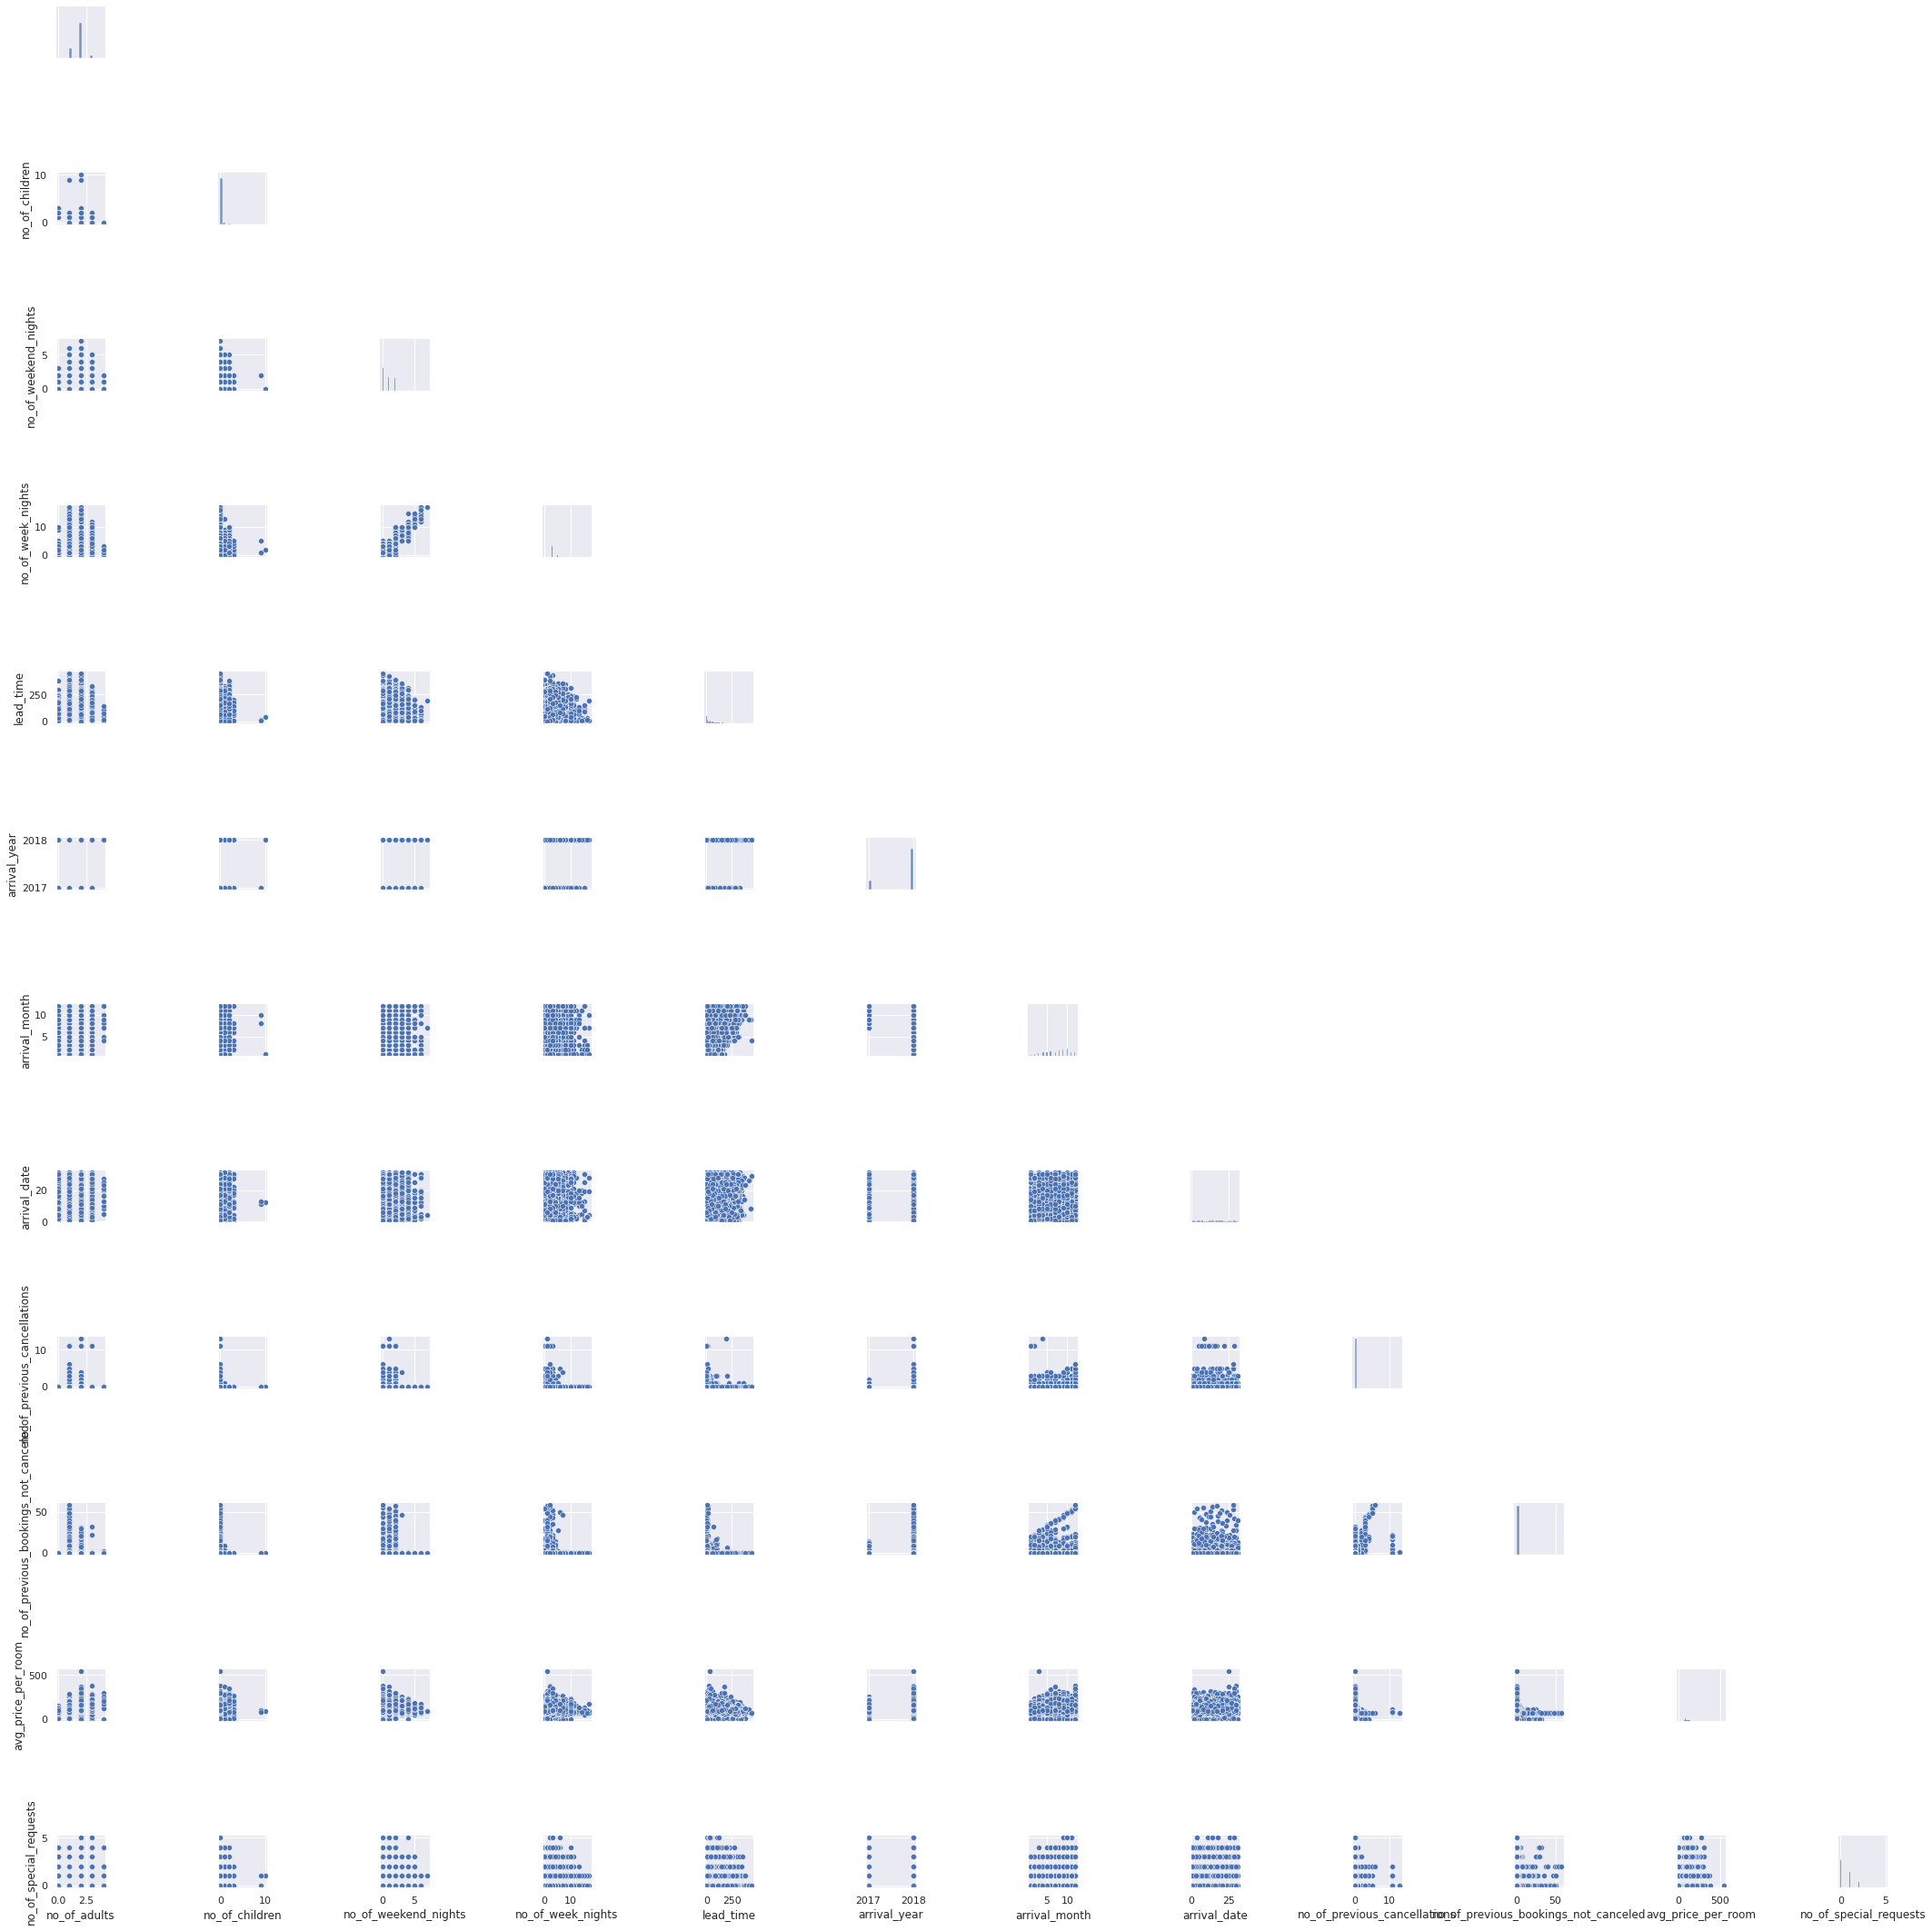

In [67]:
# In order to get two-dimensional distributions in case of multiple datasets, a 'pairplot' is being used.

sns.pairplot(data=hotel, kind="scatter", corner=True)
# Creating a pairplot for all numerical variables

#### Observations
* There is a `positive relation between no_of_weekend_nights and no_of_week_nights`, signifying that a guest who books for greater number of weekend nights also books for higher week nights.
* There is a `negative relation between no_of_weekend_nights and avg_price_per_room`, indicating that the more weekend nights one books, the lesser would be the average price per day.
* There is a `negative relation between no_of_week_nights and avg_price_per_room`, indicating that the more number of week nights one books, the lesser would be the average price per day that they would be charged owing to dynamic pricing.

In [68]:
hotel.corr()  # Creating a Correlation Matrix

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.00000,-0.01979,0.10332,0.10562,0.09729,0.07672,0.02184,0.02634,-0.04743,-0.11917,0.29689,0.18940
no_of_children,-0.01979,1.00000,0.02948,0.02440,-0.04709,0.04598,-0.00308,0.02548,-0.01639,-0.02119,0.33773,0.12449
no_of_weekend_nights,0.10332,0.02948,1.00000,0.17958,0.04660,0.05536,-0.00989,0.02730,-0.02069,-0.02631,-0.00452,0.06059
no_of_week_nights,0.10562,0.02440,0.17958,1.00000,0.14965,0.03267,0.03738,-0.00930,-0.03008,-0.04934,0.02275,0.04599
lead_time,0.09729,-0.04709,0.04660,0.14965,1.00000,0.14344,0.13681,0.00648,-0.04572,-0.07814,-0.06260,-0.10164
arrival_year,0.07672,0.04598,0.05536,0.03267,0.14344,1.00000,-0.33969,0.01885,0.00392,0.02642,0.17860,0.05321
arrival_month,0.02184,-0.00308,-0.00989,0.03738,0.13681,-0.33969,1.00000,-0.04278,-0.03861,-0.01072,0.05442,0.11055
arrival_date,0.02634,0.02548,0.02730,-0.00930,0.00648,0.01885,-0.04278,1.00000,-0.01254,-0.00150,0.01790,0.01835
no_of_previous_cancellations,-0.04743,-0.01639,-0.02069,-0.03008,-0.04572,0.00392,-0.03861,-0.01254,1.00000,0.46815,-0.06334,-0.00332
no_of_previous_bookings_not_canceled,-0.11917,-0.02119,-0.02631,-0.04934,-0.07814,0.02642,-0.01072,-0.00150,0.46815,1.00000,-0.11368,0.02738


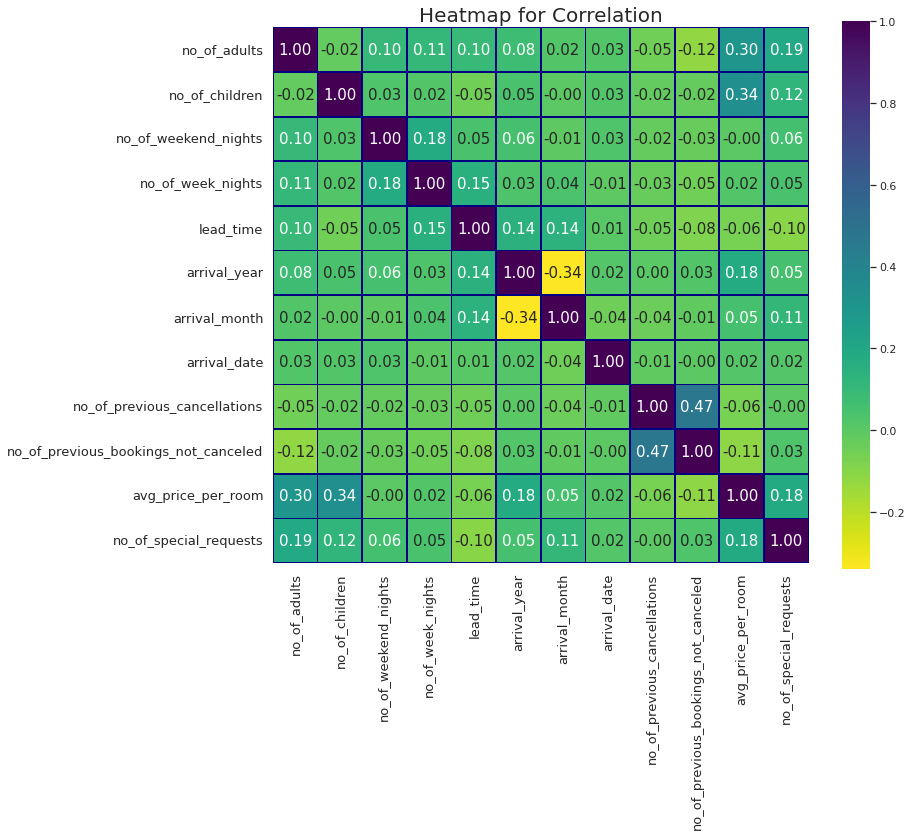

In [69]:
plt.figure(figsize=(12, 12))
plt.title("Heatmap for Correlation", fontsize=20)  # Setting plot title
plt.xticks(fontsize=13)  # Setting x-axis font size
plt.yticks(fontsize=13)  # Setting y-axis font size
sns.heatmap(
    hotel.corr(),
    square=True,
    linewidths=0.8,
    linecolor="navy",
    cmap="viridis_r",
    fmt=".2f",
    annot=True,
    annot_kws={"size": 15},
    cbar_kws={"shrink": 0.84},
)
# Creating heatmap for showing correlations between all numerical variables

#### Observations
* As is evident, there are no strong positive and strong negative correlations existing between the study variables.
* `Lead time has a negative relation` with no_of_children, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, no_of_special_requests and average price per room.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
    - Create dummy variables (One hot encoding)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### I. Checking for missing values

In [70]:
# checking for null values
hotel.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no null values in the dataset

### II. As checked in the beginning, there were no duplicated values in the data with Booking ID as being the unique identifier. However, Booking ID was later dropped from analyis as it has no bearing on booking cancellations.

### III. The data types for the categorical columns of `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, `required_car_parking_space` and `repeated_guest` were fixed to begin with, as is visible below:

In [71]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  category
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

### IV. Creating dummies for categorical variables

In [72]:
hotel = pd.get_dummies(
    hotel,
    columns=["type_of_meal_plan", "room_type_reserved", "market_segment_type"],
    drop_first=True,
)
hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


### V. Creating a new variable "total_stay" by concatenating the two colums of "no_of_weekend_nights" and 'no_of_week_nights".
### Next, calculating the total_revenue generated from each booking, i.e., the total spend by the guest for the duration of their stay at the hotel  by multiplying the the "total_stay" with the "avg_price_per_room".

In [73]:
hotel["total_stay"] = hotel["no_of_weekend_nights"] + hotel["no_of_week_nights"]
hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,total_stay
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,1,0,3
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,1,5
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,1,3
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,1,2
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,1,2


In [74]:
hotel["total_revenue"] = hotel["total_stay"] * hotel["avg_price_per_room"]
hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,total_stay,total_revenue
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,1,0,3,195.00000
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,1,5,533.40000
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,1,3,180.00000
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,1,2,200.00000
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,1,2,189.00000


### VI. Let's drop the redundant columns

In [75]:
hotel.drop(
    ["no_of_weekend_nights", "no_of_week_nights", "avg_price_per_room"],
    axis=1,
    inplace=True,
)

In [76]:
hotel.head()

,no_of_adults,no_of_children,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,total_stay,total_revenue
0,2,0,0,224,2017,10,2,0,0,0,...,0,0,0,0,0,0,1,0,3,195.00000
1,2,0,0,5,2018,11,6,0,0,0,...,0,0,0,0,0,0,0,1,5,533.40000
2,1,0,0,1,2018,2,28,0,0,0,...,0,0,0,0,0,0,0,1,3,180.00000
3,2,0,0,211,2018,5,20,0,0,0,...,0,0,0,0,0,0,0,1,2,200.00000
4,2,0,0,48,2018,4,11,0,0,0,...,0,0,0,0,0,0,0,1,2,189.00000


### VII. Outlier Detection and Treatment

#### i) Outlier Detection

In [77]:
hotel.columns

Index(['no_of_adults', 'no_of_children', 'required_car_parking_space',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'no_of_special_requests',
       'booking_status', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'total_stay', 'total_revenue'],
      dtype='object')

In [78]:
numeric_columns = [
    "no_of_adults",
    "no_of_children",
    "lead_time",
    "no_of_previous_cancellations",
    "no_of_previous_bookings_not_canceled",
    "no_of_special_requests",
    "total_stay",
    "total_revenue",
]

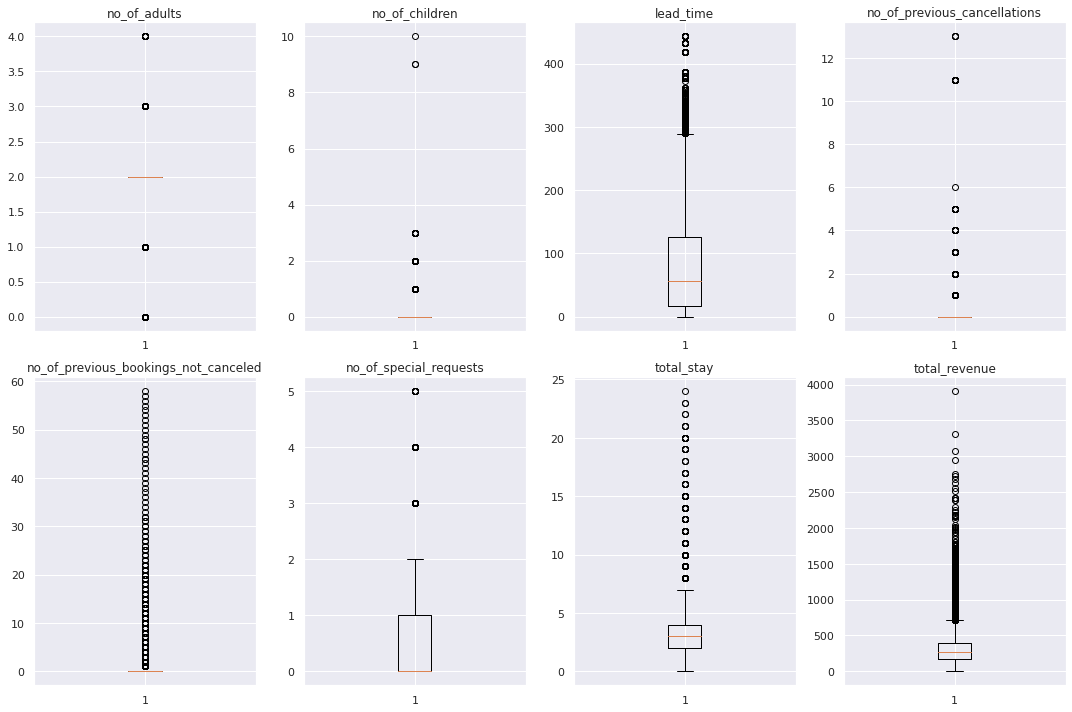

In [79]:
# Let's plot the boxplots of all columns to check for outliers

plt.figure(figsize=(15, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)
    plt.boxplot(hotel[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations
* There are quite a few outliers in the data, mostly at the upper end.
* Since the values look like proper values, we will not treat them.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [80]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
no_of_previous_cancellations,36275.00000,0.02335,0.36833,0.00000,0.00000,0.00000,0.00000,13.00000
no_of_previous_bookings_not_canceled,36275.00000,0.15341,1.75417,0.00000,0.00000,0.00000,0.00000,58.00000
no_of_special_requests,36275.00000,0.61966,0.78624,0.00000,0.00000,0.00000,1.00000,5.00000
type_of_meal_plan_Meal Plan 2,36275.00000,0.09111,0.28777,0.00000,0.00000,0.00000,0.00000,1.00000


#### Observations
* The mean length of total stay is 3 days, ranging from a minimum of 0 days to a maximum of 24 days.
* The mean of the total revenue is around 310 euros, ranging from a minimum of 0 euros to a maximum of 3910 euros.

In [81]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   required_car_parking_space            36275 non-null  category
 3   lead_time                             36275 non-null  int64   
 4   arrival_year                          36275 non-null  int64   
 5   arrival_month                         36275 non-null  int64   
 6   arrival_date                          36275 non-null  int64   
 7   repeated_guest                        36275 non-null  category
 8   no_of_previous_cancellations          36275 non-null  int64   
 9   no_of_previous_bookings_not_canceled  36275 non-null  int64   
 10  no_of_special_requests                36275 non-null  int64   
 11  bo

### Let's look at the relationships between the newly created variables.

<Figure size 864x720 with 0 Axes>

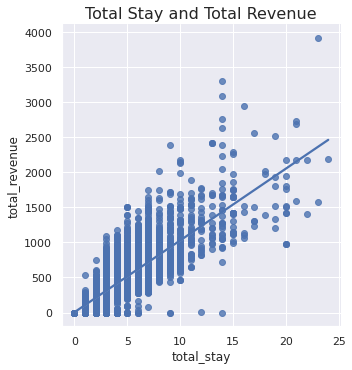

In [82]:
plt.figure(figsize=(12, 10))
sns.lmplot(
    data=hotel, x="total_stay", y="total_revenue", palette="viridis", ci=False
)  # Creating countplot of Total Stay and Total Revenue
plt.title("Total Stay and Total Revenue", fontsize=16)  # Setting plot title

plt.show()

#### Observations
* The longer the length of stay, higher is the revenue generated.

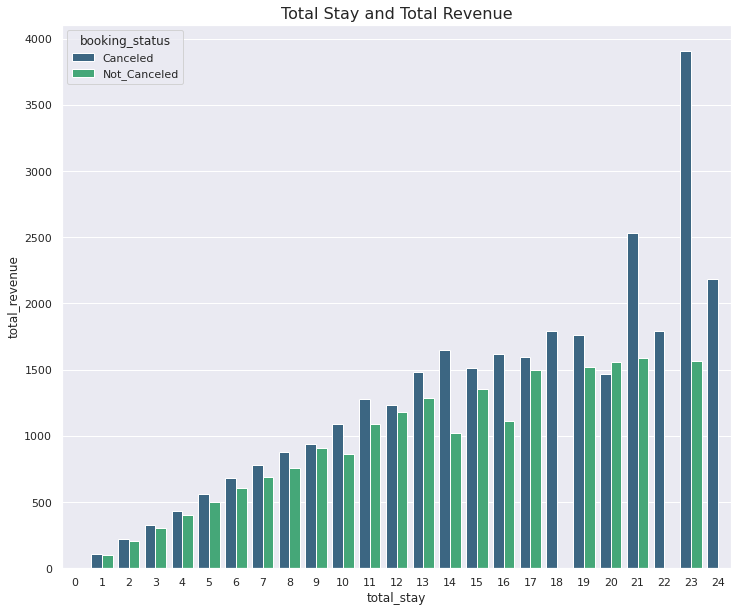

In [83]:
plt.figure(figsize=(12, 10))
sns.barplot(
    data=hotel,
    x="total_stay",
    y="total_revenue",
    hue="booking_status",
    palette="viridis",
    ci=False,
)  # Creating barplot of booking status by Total Stay and Total Revenue
plt.title("Total Stay and Total Revenue", fontsize=16)  # Setting plot title

plt.show()

#### Observations
* As the length of the stay increases, so does the revenue. 
* However, the number of cancellations is also higher for these longer stays, particularly for stays above 14 days.

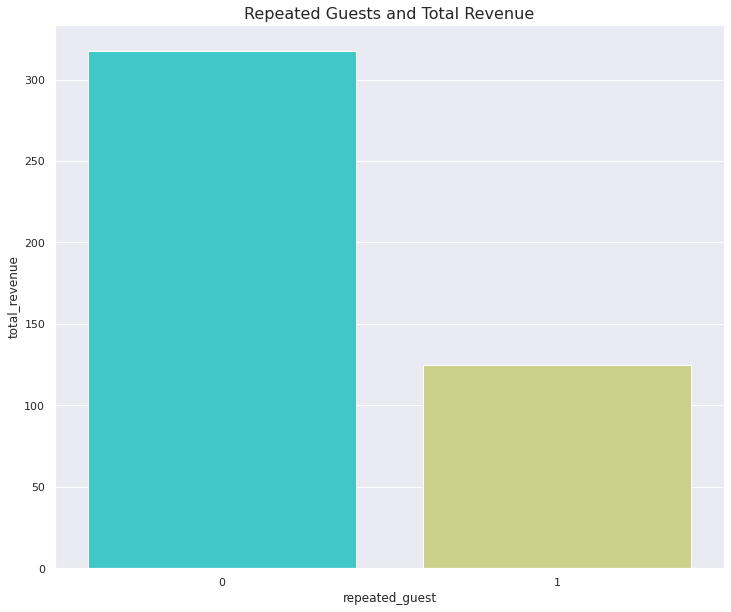

In [84]:
plt.figure(figsize=(12, 10))
sns.barplot(
    data=hotel,
    x="repeated_guest",
    y="total_revenue",
    palette="rainbow",
    ci=False,
)  # Creating barplot of Repeated Guests and Total Revenue
plt.title("Repeated Guests and Total Revenue", fontsize=16)  # Setting plot title

plt.show()

#### Observations
* The majority of revenue was generated through fresh booking from new customers.

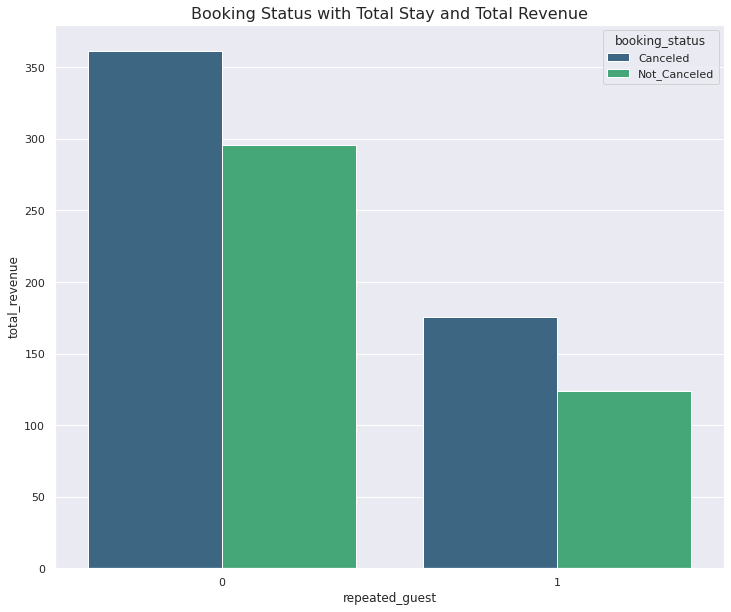

In [85]:
plt.figure(figsize=(12, 10))
sns.barplot(
    data=hotel,
    x="repeated_guest",
    y="total_revenue",
    hue="booking_status",
    palette="viridis",
    ci=False,
)  # Creating barplot of booking_status with repeated guest and total Revenue
plt.title(
    "Booking Status with Total Stay and Total Revenue", fontsize=16
)  # Setting plot title

plt.show()

#### Observations
* The `revenue lost by the hotel due to cancellations was more than the revenue generated through new bookings`.
* For new customers who were not repeated guests, the number of cancellations were more than the non-cancellations.
* For the repeated customers too, the number of cancellations exceeded the non-cancellations, negatively impacting the total revenue generated by the hotel.

In [86]:
# import preprocessing library to encode booking status
from sklearn.preprocessing import LabelEncoder

# transform the booking status to binary
le = LabelEncoder()
booking_status_encoded = le.fit_transform(hotel["booking_status"])

hotel["booking_status_encoded"] = booking_status_encoded

In [87]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   required_car_parking_space            36275 non-null  category
 3   lead_time                             36275 non-null  int64   
 4   arrival_year                          36275 non-null  int64   
 5   arrival_month                         36275 non-null  int64   
 6   arrival_date                          36275 non-null  int64   
 7   repeated_guest                        36275 non-null  category
 8   no_of_previous_cancellations          36275 non-null  int64   
 9   no_of_previous_bookings_not_canceled  36275 non-null  int64   
 10  no_of_special_requests                36275 non-null  int64   
 11  bo

### Preparing data for modeling 

* We want to predict the number of cancellations for the hotel.
* For preparing the data for modeling, we'll split the data into train and test to be able to evaluate the model that we build on the train data.
* The next step would be building a Logistic Regression model using the train data and then check it's performance.

#### Splitting data into train and test

In [88]:
# defining X and y variables
drop_var = ["booking_status", "booking_status_encoded"]
X = hotel.drop(drop_var, axis=1)
Y = hotel["booking_status_encoded"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# Create dummy variables for object and category dtypes
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

In [89]:
# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [90]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
1   0.67238
0   0.32762
Name: booking_status_encoded, dtype: float64
Percentage of classes in test set:
1   0.67233
0   0.32767
Name: booking_status_encoded, dtype: float64


## Model Building - Logistic Regression

In [91]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                             Logit Regression Results                             
Dep. Variable:     booking_status_encoded   No. Observations:                25392
Model:                              Logit   Df Residuals:                    25365
Method:                               MLE   Df Model:                           26
Date:                    Sat, 09 Jul 2022   Pseudo R-squ.:                  0.3243
Time:                            07:53:39   Log-Likelihood:                -10851.
converged:                          False   LL-Null:                       -16060.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 1153.6691    118.531      9.733      0.000     921.353    1385.985
no_of_adults         

#### Observations
* Negative values of the coefficient shows that probability of customer not cancelling a booking decreases with the increase of corresponding attribute value.
    - Eg: With a unit increase in lead time, there is 1.5% decrease in the probability of the booking not being cancelled
* Positive values of the coefficient show that that probability of customer not cancelling a booking increases with the increase of corresponding attribute value.
    - Eg: With a unit increase in total length of stay, there is 33% increase in the probability of the booking not being cancelled. This could mean the probability of cancellations is higher with shorter length of stay.
* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.
    - Here, all predictor variables except 'arrival_date', 'no_of_previous_bookings_not_canceled', 'type_of_meal_plan_Meal Plan 3', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 5', 'market_segment_type_Complementary' and 'market_segment_type_Online' are significant.

### Model Evaluation Criterion
**Model can make wrong predictions as**:

1. Model predicted a non-cancellation as a cancellation - False Positive
2. Model predicted a cancellation as a non-cancellation - `False Negative > We will attempt to minimise these`.

**How to reduce this loss i.e need to reduce False Negatives?**

Company would want to reduce false negatives, this can be done by maximizing the `**Recall**`. Greater the recall, lesser the chances of false negatives.

We will also attempt to reduce False Positives by using the `f1_score` which penalises both FP and FN. f1_score should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly.
 * f1_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$
  
- First, let's create functions to calculate different metrics and confusion matrix
- The model_performance_classification_statsmodels function will be used to check the model performance of models.
- The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [92]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [93]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

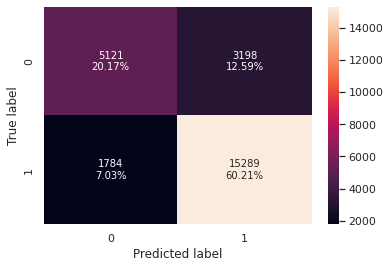

In [94]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [95]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80380,0.89551,0.82701,0.85990


#### Observations
* The f1_score of the model is 0.8599 and we will try to maximize it further through treating anomalies (multicollinearity) in the data.
* We will focus on minimizing the Recall as well.

### Checking Multicollinearity

* In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.
* We will use the Variation Inflation Factor (VIF) to identify and treat multicollinearity.

In [96]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  38302725.82074
no_of_adults                                  1.31750
no_of_children                                2.00517
lead_time                                     1.36684
arrival_year                                  1.39433
arrival_month                                 1.25651
arrival_date                                  1.00596
no_of_previous_cancellations                  1.36745
no_of_previous_bookings_not_canceled          1.63703
no_of_special_requests                        1.24944
type_of_meal_plan_Meal Plan 2                 1.25443
type_of_meal_plan_Meal Plan 3                 1.02600
type_of_meal_plan_Not Selected                1.26495
room_type_reserved_Room_Type 2                1.09515
room_type_reserved_Room_Type 3                1.00332
room_type_reserved_Room_Type 4                1.35213
room_type_reserved_Room_Type 5                1.02398
room_type_reserved_Room_Type 6                1

* `market_segment_type_Online`, `market_segment_type_Offline` and `market_segment_type_Corporate` exhibit high multicollinearity (VIF > 10)

* `total_revenue` exhibits moderate multicollinearity (VIF > 5).

* `total_stay` and `market_segment_type_Complementary` exhibit slight multicollinearity (VIF < 5).

**Removing `market_segment_type_Corporate`**

In [97]:
X_train1 = X_train.drop(["market_segment_type_Corporate"], axis=1)

#### Observations
* Although `market_segment_type_Online` had the highest multicollinearity amongst the predictor variables, however it is one of the main market segments, comprising `64% of the total bookings`. Removing this will impact overall effectiveness and interpretation of the model results.
* Therefore, market_segment_type_Corporate, which also has a high VIF, is being removed instead.

#### Running the Logistic Regression Model again after dropping `market_segment_type_corporate`

In [98]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                             Logit Regression Results                             
Dep. Variable:     booking_status_encoded   No. Observations:                25392
Model:                              Logit   Df Residuals:                    25366
Method:                               MLE   Df Model:                           25
Date:                    Sat, 09 Jul 2022   Pseudo R-squ.:                  0.3240
Time:                            07:53:42   Log-Likelihood:                -10856.
converged:                          False   LL-Null:                       -16060.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 1169.0969    118.315      9.881      0.000     937.204    1400.990
no_of_adults         

#### VIF for lg1

In [99]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  38223816.98658
no_of_adults                                  1.31418
no_of_children                                2.00515
lead_time                                     1.36591
arrival_year                                  1.39180
arrival_month                                 1.25606
arrival_date                                  1.00595
no_of_previous_cancellations                  1.36674
no_of_previous_bookings_not_canceled          1.63357
no_of_special_requests                        1.24925
type_of_meal_plan_Meal Plan 2                 1.25402
type_of_meal_plan_Meal Plan 3                 1.02599
type_of_meal_plan_Not Selected                1.26468
room_type_reserved_Room_Type 2                1.09513
room_type_reserved_Room_Type 3                1.00332
room_type_reserved_Room_Type 4                1.34538
room_type_reserved_Room_Type 5                1.02340
room_type_reserved_Room_Type 6                1

#### Checking model performance after dropping market_segment_type_Online

In [100]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80348,0.89545,0.82669,0.85970


#### Observations
* Dropping `market_segment_type_Corporate` has led to a decrease in the overall VIF for all the predictor variables.
* Some of the categorical levels of a variable have VIF>5 which can simply be ignored.
* We will proceed with lg1 model for further analysis.

### Removing high p-value variables
* We will be dropping variables with a p-value greater than 0.05.

**Dropping `market_segment_type_Complementary`** with a high p-value of 1.000.

In [101]:
X_train2 = X_train1.drop(["market_segment_type_Complementary"], axis=1)

logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()

print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.428159
         Iterations 12
                             Logit Regression Results                             
Dep. Variable:     booking_status_encoded   No. Observations:                25392
Model:                              Logit   Df Residuals:                    25367
Method:                               MLE   Df Model:                           24
Date:                    Sat, 09 Jul 2022   Pseudo R-squ.:                  0.3230
Time:                            07:53:44   Log-Likelihood:                -10872.
converged:                           True   LL-Null:                       -16060.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                  

**Dropping `room_type_reserved_Room_Type 3`** with a high p-value of 0.906.

In [102]:
X_train3 = X_train2.drop(["room_type_reserved_Room_Type 3"], axis=1)

logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit()

print(lg3.summary())

Optimization terminated successfully.
         Current function value: 0.428159
         Iterations 12
                             Logit Regression Results                             
Dep. Variable:     booking_status_encoded   No. Observations:                25392
Model:                              Logit   Df Residuals:                    25368
Method:                               MLE   Df Model:                           23
Date:                    Sat, 09 Jul 2022   Pseudo R-squ.:                  0.3230
Time:                            07:53:44   Log-Likelihood:                -10872.
converged:                           True   LL-Null:                       -16060.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                  

**Dropping `arrival_date`** with a high p-value of 0.667.

In [103]:
X_train4 = X_train3.drop(["arrival_date"], axis=1)

logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit()

print(lg4.summary())

Optimization terminated successfully.
         Current function value: 0.428163
         Iterations 12
                             Logit Regression Results                             
Dep. Variable:     booking_status_encoded   No. Observations:                25392
Model:                              Logit   Df Residuals:                    25369
Method:                               MLE   Df Model:                           22
Date:                    Sat, 09 Jul 2022   Pseudo R-squ.:                  0.3230
Time:                            07:53:44   Log-Likelihood:                -10872.
converged:                           True   LL-Null:                       -16060.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                  

**Dropping `no_of_previous_bookings_not_canceled`** with a high p-value of 0.329.

In [104]:
X_train5 = X_train4.drop(["no_of_previous_bookings_not_canceled"], axis=1)

logit5 = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit5.fit()

print(lg5.summary())

Optimization terminated successfully.
         Current function value: 0.428192
         Iterations 11
                             Logit Regression Results                             
Dep. Variable:     booking_status_encoded   No. Observations:                25392
Model:                              Logit   Df Residuals:                    25370
Method:                               MLE   Df Model:                           21
Date:                    Sat, 09 Jul 2022   Pseudo R-squ.:                  0.3230
Time:                            07:53:45   Log-Likelihood:                -10873.
converged:                           True   LL-Null:                       -16060.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           115

**Dropping `room_type_reserved_Room_Type 5`** with a high p-value of 0.086.

In [105]:
X_train6 = X_train5.drop(["room_type_reserved_Room_Type 5"], axis=1)

logit6 = sm.Logit(y_train, X_train6.astype(float))
lg6 = logit6.fit()

print(lg6.summary())

Optimization terminated successfully.
         Current function value: 0.428251
         Iterations 11
                             Logit Regression Results                             
Dep. Variable:     booking_status_encoded   No. Observations:                25392
Model:                              Logit   Df Residuals:                    25371
Method:                               MLE   Df Model:                           20
Date:                    Sat, 09 Jul 2022   Pseudo R-squ.:                  0.3229
Time:                            07:53:45   Log-Likelihood:                -10874.
converged:                           True   LL-Null:                       -16060.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           115

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train6* as the final ones and *lg6* as final model.**

#### Observations - Coefficient Interpretations

* Coefficients of no_of_special_requests, room_type_reserved, market_segment_type_Offline, total_stay, required_car_parking_space_1 and repeated_guest_1 are positive. With an increase in unit change change in these variables, the probability of booking not being cancelled increases.

* Coefficients of no_of_adults, no_of_children, lead_time, no_of_previous_cancellations, type_of_meal_plan, market_segment_type_Online and total_revenue are negative. A unit increase in these will lead to decrease in the probability of a customer not cancelling a booking.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [106]:
# converting coefficients to odds
odds = np.exp(lg6.params)

# finding the percentage change
perc_change_odds = (np.exp(lg6.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train6.columns).T

,const,no_of_adults,no_of_children,lead_time,arrival_year,arrival_month,no_of_previous_cancellations,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Offline,market_segment_type_Online,total_stay,total_revenue,required_car_parking_space_1,repeated_guest_1
Odds,inf,0.87413,0.83846,0.98516,0.56593,1.02714,0.81913,4.41591,0.76145,0.06224,0.88235,1.48642,1.14244,1.71667,3.77190,2.17130,0.34038,1.39886,0.99606,4.48588,10.51277
Change_odd%,inf,-12.58679,-16.15433,-1.48411,-43.40687,2.71370,-18.08719,341.59118,-23.85472,-93.77550,-11.76466,48.64189,14.24353,71.66748,277.19032,117.12971,-65.96212,39.88569,-0.39355,348.58814,951.27696


#### Observations - Coefficient interpretations

* `lead_time`: Holding all other features constant a 1 unit increase in Lead Time will decrease the odds of a customer not cancelling a booking by 0.98 times or 1.5%.
* `total_revenue`: Holding all other features constant a 1 unit increase in Total Revenue will decrease the odds of a customer not cancelling a booking by 0.99 times.
* `total_stay`: Holding all other features constant, a 1 unit increase in Total Length of Stay will increase the odds of a customer not cancelling a booking by close to 40%.

### Checking performance of the new model

#### Training Set Performance

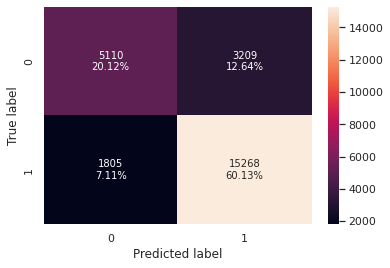

In [107]:
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_train6, y_train)

In [108]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg6, X_train6, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80254,0.89428,0.82632,0.85896


### ROC-AUC on training set

* We will attempt to improve the Recall and f1_scores by changing the model threshold, under the ROC curve (ROC-AUC).

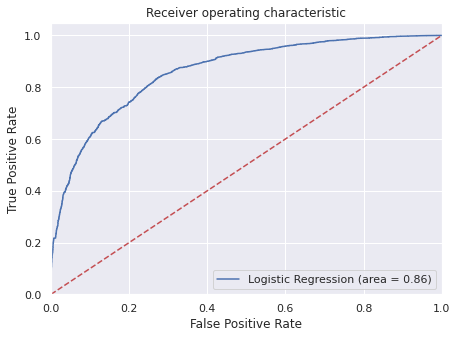

In [109]:
logit_roc_auc_train = roc_auc_score(y_train, lg6.predict(X_train6))
fpr, tpr, thresholds = roc_curve(y_train, lg6.predict(X_train6))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Optimal threshold using AUC-ROC curve

In [110]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg6.predict(X_train6))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.615606462550883


**Checking model performance on training set on new model**

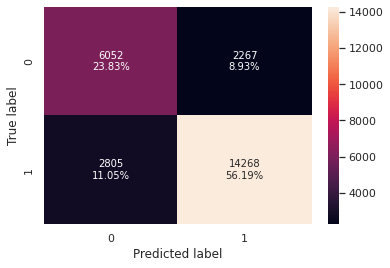

In [111]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg6, X_train6, y_train, threshold=optimal_threshold_auc_roc
)

In [112]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg6, X_train6, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80025,0.83571,0.86290,0.84908


#### Observations
* Model performance has improved with Precision of model increasing from 0.826 to 0.863.
* However, the other metrics have reduced.
* Let's use Precision-Recall curve and see if we can find a better threshold

### Precision-Recall Curve

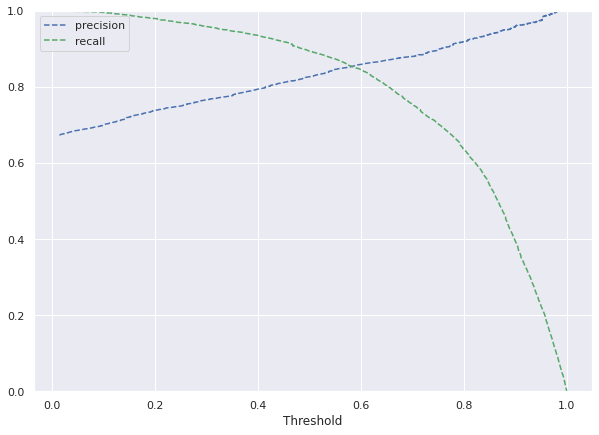

In [113]:
y_scores = lg6.predict(X_train6)
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At threshold around 0.59 we will get equal precision and recall.

In [114]:
# setting the threshold
optimal_threshold_curve = 0.59

**Checking model performance on training set**

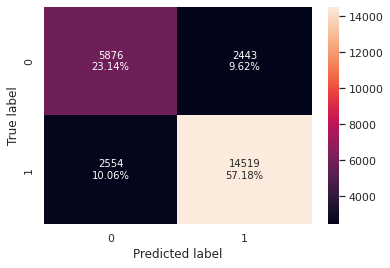

In [115]:
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_train6, y_train, threshold=optimal_threshold_curve)

In [116]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg6, X_train6, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80321,0.85041,0.85597,0.85318


#### Observations
* Recall has improved as compared to the initial model, from 0.836 to 0.850.
* F1 score as well as accuracy has also increased.
* Model is performing well on training set and giving a better performance with 0.59 threshold found using AUC-ROC curve.

### Model Performance Summary

In [117]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.62 Threshold",
    "Logistic Regression-0.59 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.62 Threshold,Logistic Regression-0.59 Threshold
Accuracy,0.80254,0.80025,0.80321
Recall,0.89428,0.83571,0.85041
Precision,0.82632,0.86290,0.85597
F1,0.85896,0.84908,0.85318


### **Test set performance on lg6**

- We have to first drop the columns from the test set that were dropped from the training set.

In [118]:
X_test6 = X_test[list(X_train6.columns)]

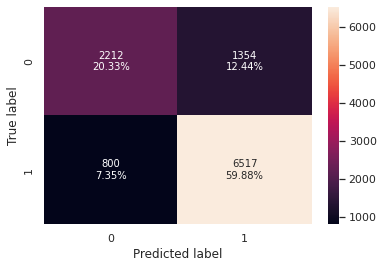

In [119]:
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_test6, y_test)

In [120]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg6, X_test6, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80208,0.89067,0.82798,0.85818


#### Observations
* The model is giving a good f1_score of 0.859 and 0.858 on the train and test sets respectively.
* The Recall score on both train and test sets is comparable at 0.894 and 0.890 respectively.
* As the train and test performances are comparable, the model is not overfitting.
* Moving forward we will try to improve the performance of the model.

#### Checking model performance on test set using ROC-AUC

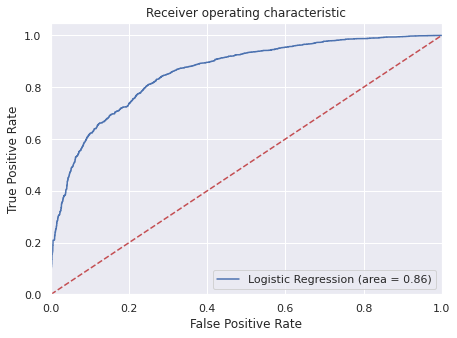

In [121]:
logit_roc_auc_train = roc_auc_score(y_test, lg6.predict(X_test6))
fpr, tpr, thresholds = roc_curve(y_test, lg6.predict(X_test6))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Checking test set performance at threshold = 0.62

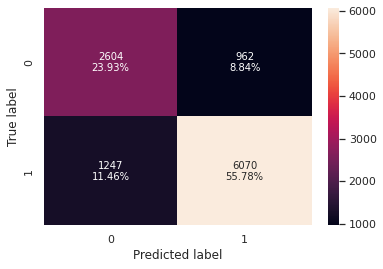

In [122]:
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_test6, y_test, threshold=optimal_threshold_auc_roc)

In [123]:
# checking model performance for this model using model with threshold=0.62

log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg6, X_test6, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79702,0.82957,0.86320,0.84605


#### Checking test set performance at threshold = 0.59

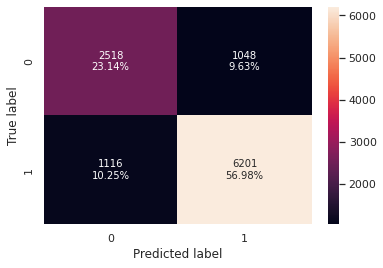

In [124]:
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_test6, y_test, threshold=optimal_threshold_curve)

In [125]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg6, X_test6, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80116,0.84748,0.85543,0.85143


In [126]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.61 Threshold",
    "Logistic Regression-0.59 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.61 Threshold,Logistic Regression-0.59 Threshold
Accuracy,0.80208,0.79702,0.80116
Recall,0.89067,0.82957,0.84748
Precision,0.82798,0.86320,0.85543
F1,0.85818,0.84605,0.85143


#### Let's print the training comparison performance summary once again

In [127]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.62 Threshold",
    "Logistic Regression-0.59 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.62 Threshold,Logistic Regression-0.59 Threshold
Accuracy,0.80254,0.80025,0.80321
Recall,0.89428,0.83571,0.85041
Precision,0.82632,0.86290,0.85597
F1,0.85896,0.84908,0.85318


## Final Model Summary

In [128]:
print(lg6.summary())

                             Logit Regression Results                             
Dep. Variable:     booking_status_encoded   No. Observations:                25392
Model:                              Logit   Df Residuals:                    25371
Method:                               MLE   Df Model:                           20
Date:                    Sat, 09 Jul 2022   Pseudo R-squ.:                  0.3229
Time:                            07:53:50   Log-Likelihood:                -10874.
converged:                           True   LL-Null:                       -16060.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1150.8312    118.148      9.741      0.000     919.266    1382.397
no_of_adults                      -0.13

## Conclusions and Recommendations

* Almost all the three models are performing well on both training and test data without the problem of overfitting.
* The highest recall is 89% on the training set. This model will help the hotel to identify guests and maximise its revenue by correctly identifying the potential cancellations and avoiding last minute revenue losses.
* Using the model with 0.62 threshold, the model will give a high precision but low recall scores - This model will help the hotel by saving additional costs of distribution channels, lowering prices last minute resulting in reducing the profit margin.
* Using the model with 0.59 threshold, the model will give a balance recall and precision score - This model will help the bank to maintain a balance in identifying potential customers and the additional costs.
* The model with a default threshold is giving the best accuracy, recall and F1 score. Therefore it can be selected as the final model.

* INN Hotel is facing the problem of frequent cancellations. One of the reasons is the higher lead time, i.e., the number of days between the booking and arrival. With an increase in the lead time, the number of cancellations is bound to be higher. 
    - The hotel can address this issue by limiting the number of days when the bookings can be made prior to arrival. Additionally, there can be an option of booking non-refundable rooms if a customer wishes to make advance bookings.
* With respect to the number of previous cancellations made by the customer, the negative relationship implies that there is higher probability for future booking to be cancelled as well.
    - The hotel should ensure it invests in software that helps it filter and flag leads that have potential to become customers and those are not likely to be converted.
* It can also be interpreted that rooms that are booked by more number of adults and children, i.e., bigger groups, carry a greater likelihood of getting cancelled. 
* It can also be inferred that when customers make special requests, they are less likely to cancel their booking.
    - The hotel can use this to their advantage. They can differentiate themselves by offering customised experiences to their guests such as guided city tours, local workshops, package deals for health and rejuvenation, etc.
* Also, longer the stay, there is greater probability that the booking will not be cancelled. 
    - The hotel should leverage this to gain a competitive advantage by offering deals and complimentary services to guests during their stay. This would build customer loyalty and ensure repeat customers.
* It can be interpreted that as total revenue increases, the probability of cancelling decreases. This is possible on two accounts - either the room price being high or the length of the stay being long. 
    - In case of longer stay, the hotel can certainly offer superlative experience to its guests and maximise its current as well as future revenue. However, since higher prices are associated with higher cancellations, the hotel should be mindful of the same while revising room prices.
* Since cancellations are less with repeated guests and the majority of the guests frequenting Inn hotel are new customers,
    - the hotel should make efforts to encourage repeat customers. They could offer deals such as a loyalty program and offering a discount on subsequent bookings, which would ensure the hotel gets loyal customers. 
* It is evident that the customers who belong to the online market segment are more prone to cancelling their reservations, in comparison to those who book offline.
    - The hotel can contain this practice by limiting the numbers of web retailers that it uses to sell its rooms online and also raising cancellation fees for online bookings.

## Building a Decision Tree model

* The data has already been divided into train and test.
* The hotel would want the `recall to be maximized`. Greater the recall score, higher are the chances of `minimizing the False Negatives`.

In [129]:
hdata = DecisionTreeClassifier(criterion="gini", random_state=1)
hdata.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [130]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [131]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Checking model performance on training set

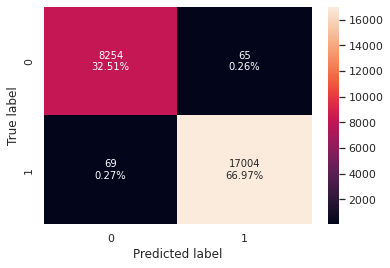

In [132]:
confusion_matrix_sklearn(hdata, X_train, y_train)

In [133]:
decision_tree_perf_train = model_performance_classification_sklearn(
    hdata, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99472,0.99596,0.99619,0.99608


#### Checking model performance on test set

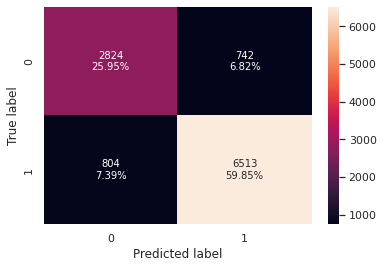

In [134]:
confusion_matrix_sklearn(hdata, X_test, y_test)

In [135]:
decision_tree_perf_test = model_performance_classification_sklearn(
    hdata, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.85794,0.89012,0.89773,0.89391


#### Observations
* The recall score in the training set is 0.995 while it's 0.890 in the test set.
* The appears to be a problem of underfitting of data.

### Visualizing the Decision Tree

In [136]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['const', 'no_of_adults', 'no_of_children', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online', 'total_stay', 'total_revenue', 'required_car_parking_space_1', 'repeated_guest_1']


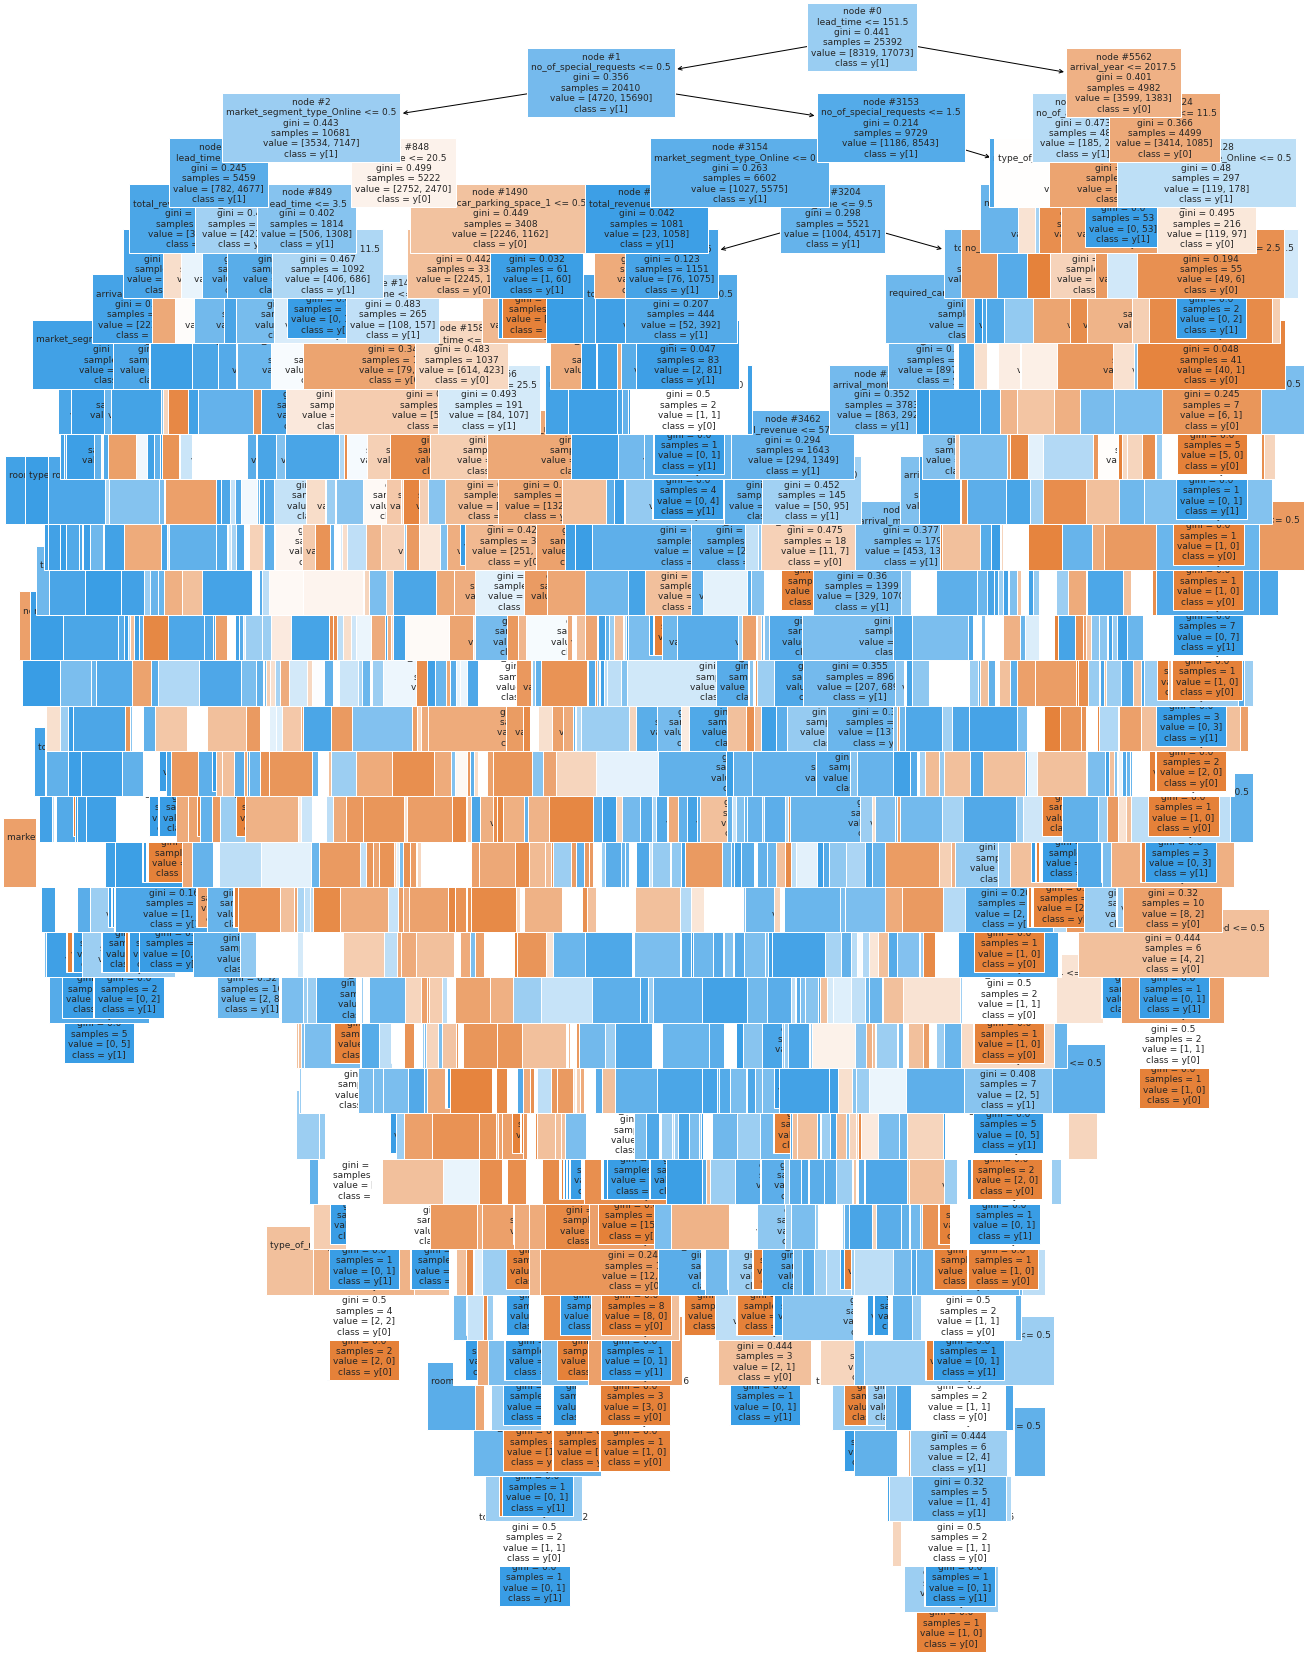

In [137]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    hdata,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

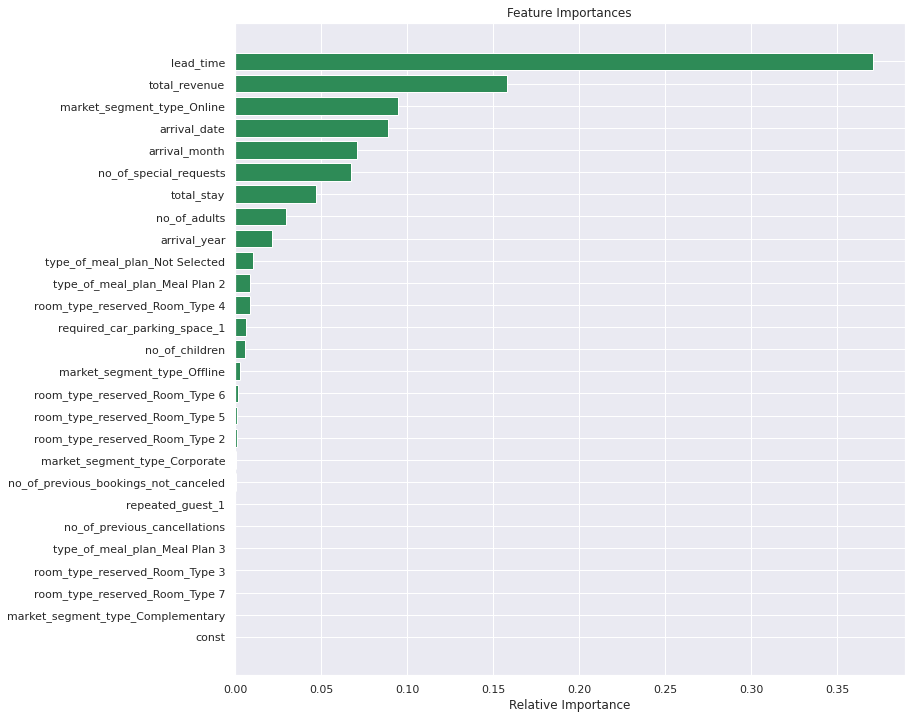

In [138]:
importances = hdata.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="seagreen", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
* Lead time is the most important feature, followed by total revenue and online market segment.

### Decision Tree (Pre-pruning)

* Using GridSearch for Hyperparameter tuning of our tree model

In [139]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=1)

#### Checking performance on training set

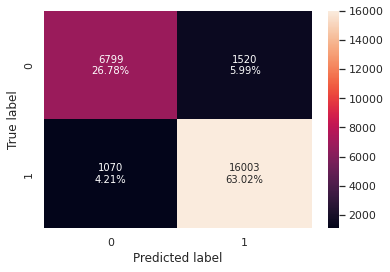

In [140]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [141]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.89800,0.93733,0.91326,0.92514


#### Checking model performance on test set

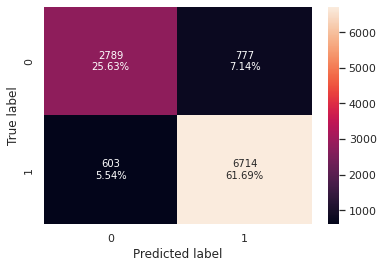

In [142]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [143]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.87320,0.91759,0.89628,0.90681


#### Observations
* After hyperparameter tuning, the performance on the test set has improved.
* The accuracy has improved from 0.858 to 0.873, recall has increased from 0.890 to 0.918 and f1_score from 0.894 to 0.907.

#### Visualizing the Pre-pruned Decision Tree

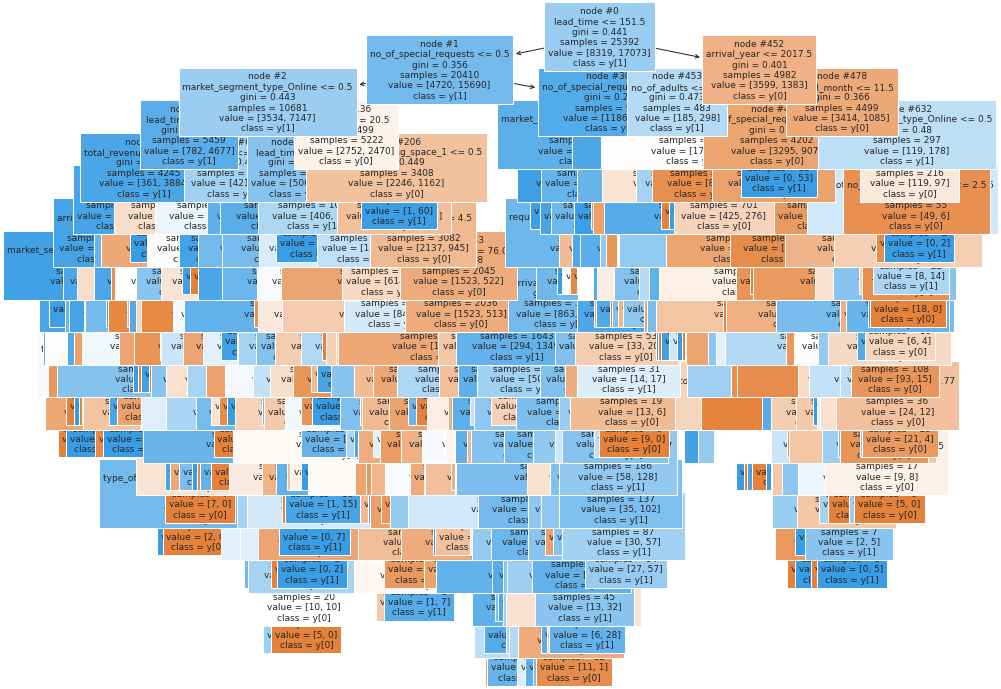

In [144]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

#### So, we are getting a simplified tree after pre-pruning, but we will improve it further.

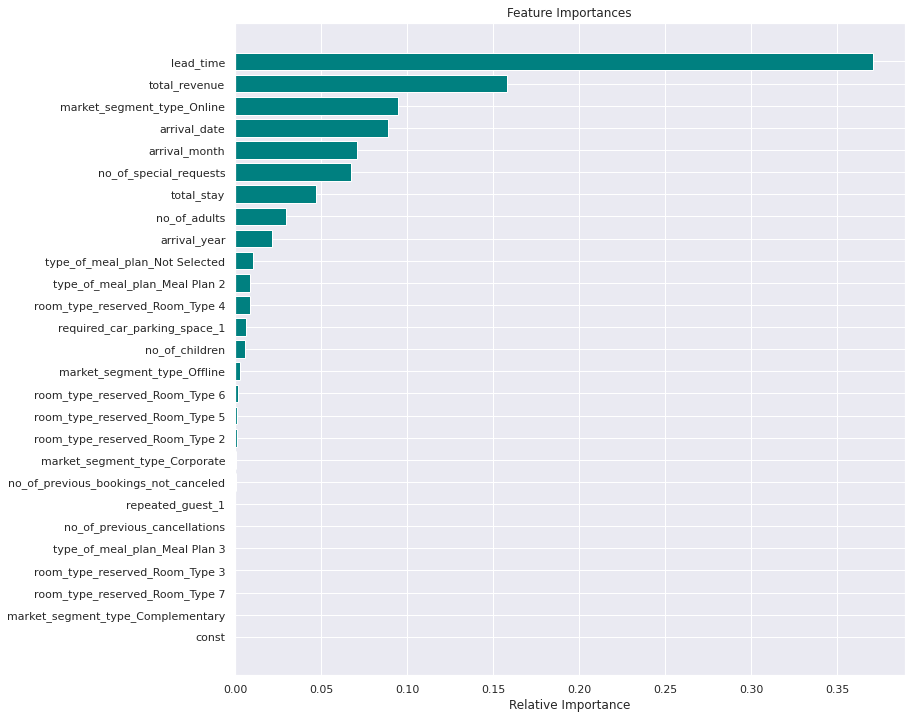

In [145]:
importances = hdata.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="teal", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Decision Tree (Post pruning) - Cost Complexity Pruning

In [146]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [147]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00684
1,0.00000,0.00684
2,0.00000,0.00684
3,0.00000,0.00684
4,0.00000,0.00684
...,...,...
1391,0.00485,0.29745
1392,0.00509,0.30255
1393,0.01347,0.31602
1394,0.02423,0.36449


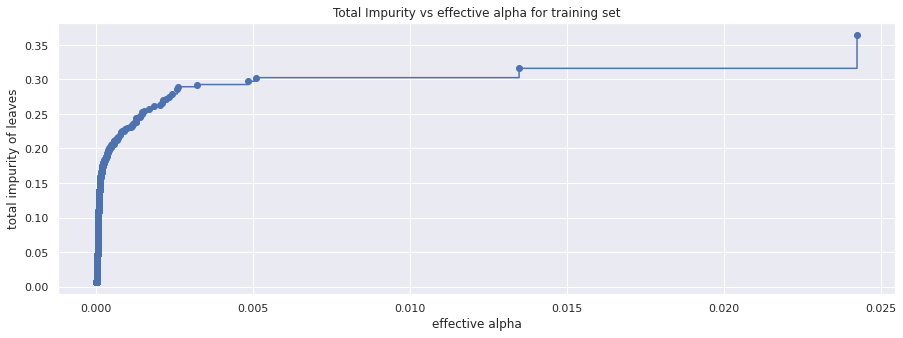

In [148]:
# Plotting the above values
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

##### So, as alpha increases, impurity also increases.

In [149]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07608448246807759


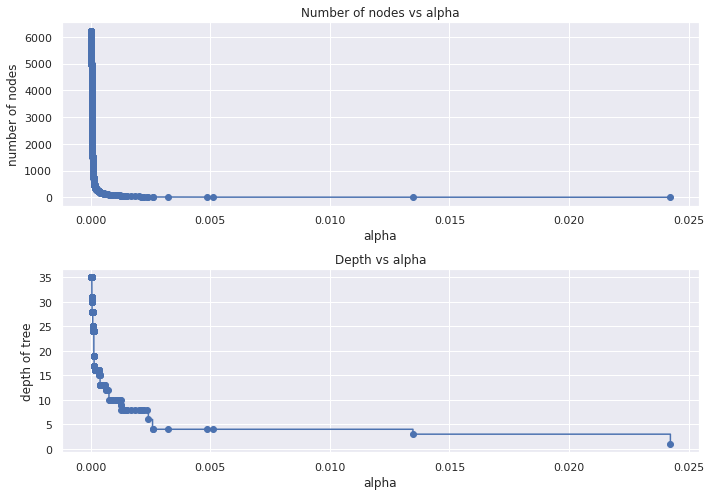

In [150]:
# Plotting using different alphas

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [151]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [152]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

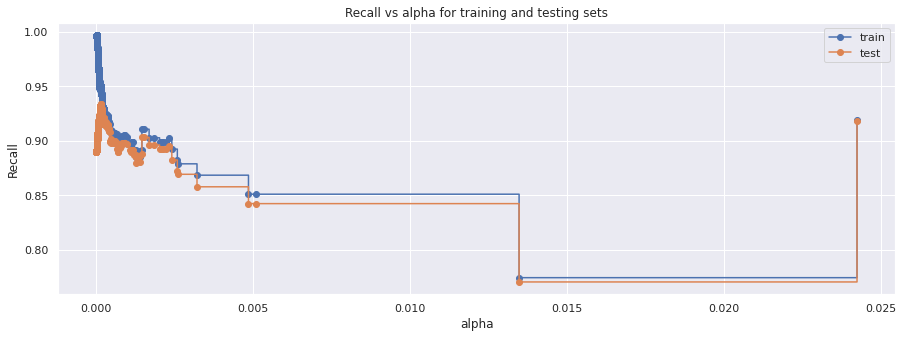

In [153]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [154]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00014532378211286367, random_state=1)


#### Checking model performance on training set

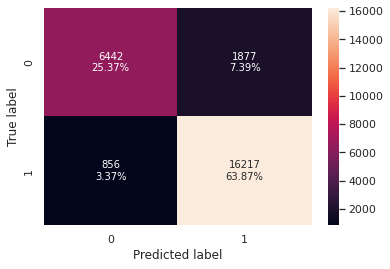

In [155]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [156]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.89237,0.94986,0.89626,0.92229


#### Checking model performance on test set

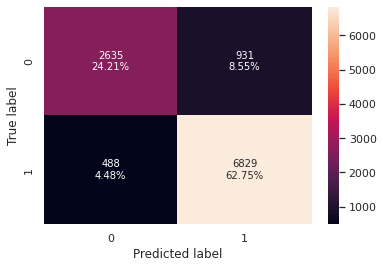

In [157]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [158]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.86961,0.93331,0.88003,0.90588


#### Observations
* After post-pruning, only the precision score has improved on the test set while all the other performance measures have decreased.

### Visualizing the Decision Tree

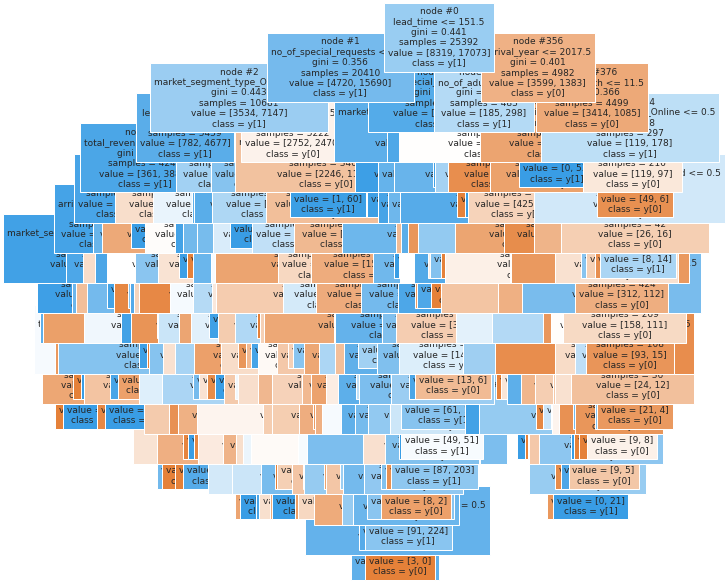

In [159]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [160]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- total_revenue <= 671.51
|   |   |   |   |   |--- lead_time <= 74.50
|   |   |   |   |   |   |--- arrival_date <= 18.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- arrival_date <= 13.50
|   |   |   |   |   |   |   |   |   |--- weights: [27.00, 469.00] class: 1
|   |   |   |   |   |   |   |   |--- arrival_date >  13.50
|   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [11.00, 144.00] class: 1
|   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |--- total_revenue <= 147.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 15.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- total_revenue >  147.00
|   |   |   |   |   |   |  

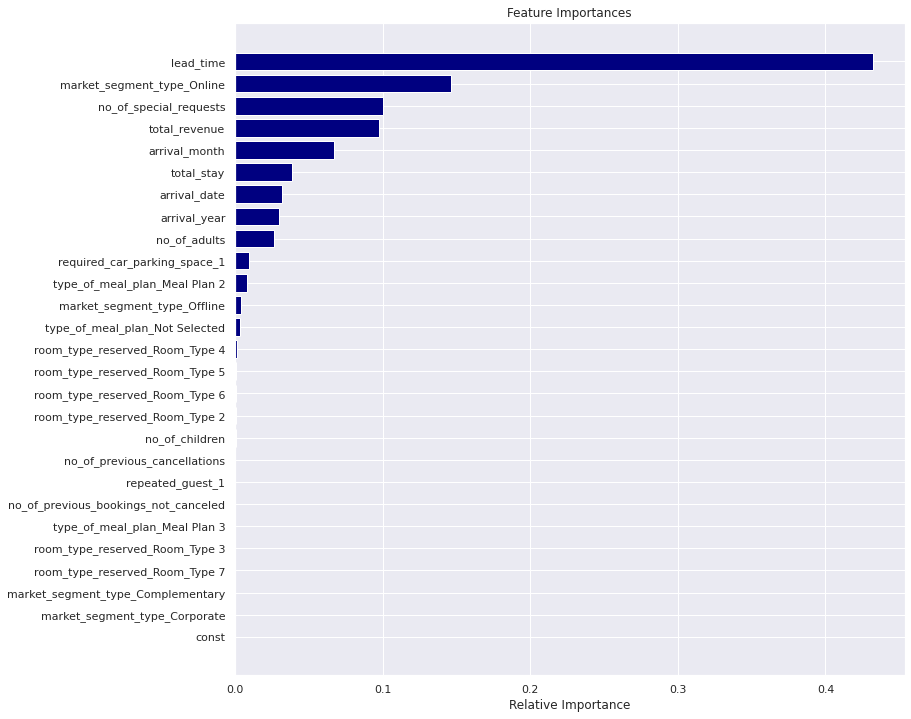

In [161]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="navy", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Lead time, Online market segment, Number of special requests and Total revenue remain the most important feature with post-pruning too.

### Comparison of Models and Final Model Selection

In [162]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99472,0.89800,0.89237
Recall,0.99596,0.93733,0.94986
Precision,0.99619,0.91326,0.89626
F1,0.99608,0.92514,0.92229


In [163]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.85794,0.87320,0.86961
Recall,0.89012,0.91759,0.93331
Precision,0.89773,0.89628,0.88003
F1,0.89391,0.90681,0.90588


#### Observations
* Decision tree with post-pruning is giving the `highest recall` on the test set, therefore, it is the best out of the above three models.
* However, the tree with post pruning too is complex and therefore, not very easy to interpret.
* `Lead time, Online market segment, Number of special requests and Total revenue` remain the most important feature impacting booking cancellations.

## Actionable Insights and Recommendations

**Decision Tree**
* The model built can be used to predict if a booking is going to be cancelled or not and can correctly identify `93.3% of the cancellations`.
* Since `lead time` has a major impact on booking cancellations, the hotel should limit the time prior to arrival when the bookings can be made by customers. It can also impose a cancellation charge, as opposed to the free cancellations that it currently offers, to discourage customers from making advance bookings.
* `Online bookings` have a higher probability of getting cancelled and thus, have a major impact on the hotel's revenue. This is owing to the ease of cancelling a booking made online. To discourage customers from making cancellations, the hotel could levy a high cancellation fees and also limit the online portals where customers can make such reservations.
* `Number of special requests` is the third most important variable in the post-pruned decision tree, indicating that the hotel should focus on meeting customer requests as these happy customers were less likely to cancel their bookings.
* `Total revenue` too is one of the important features. Now, a higher total revenue signifies either a higher average price, which the hotel should be mindful of owing to higher cancellations at higher price points, or a longer stay by the customers which would help maximize revenue.

**Logistic Regression**
* INN Hotel is facing the problem of frequent cancellations. One of the reasons is the higher lead time, i.e., the number of days between the booking and arrival. With an increase in the lead time, the number of cancellations is bound to be higher. 
    - The hotel can address this issue by limiting the number of days when the bookings can be made prior to arrival. Additionally, there can be an option of booking non-refundable rooms if a customer wishes to make advance bookings.
* With respect to the number of previous cancellations made by the customer, the negative relationship implies that there is higher probability for future booking to be cancelled as well.
    - The hotel should ensure it invests in software that helps it filter and flag leads that have potential to become customers and those are not likely to be converted.
* It can also be interpreted that rooms that are booked by more number of adults and children, i.e., bigger groups, carry a greater likelihood of getting cancelled. 
* It can also be inferred that when customers make special requests, they are less likely to cancel their booking.
    - The hotel can use this to their advantage. They can differentiate themselves by offering customised experiences to their guests such as guided city tours, local workshops, package deals for health and rejuvenation, etc.
* Also, longer the stay, there is greater probability that the booking will not be cancelled. 
    - The hotel should leverage this to gain a competitive advantage by offering deals and complimentary services to guests during their stay. This would build customer loyalty and ensure repeat customers.
* It can be interpreted that as total revenue increases, the probability of cancelling decreases. This is possible on two accounts - either the room price being high or the length of the stay being long. 
    - In case of longer stay, the hotel can certainly offer superlative experience to its guests and maximise its current as well as future revenue. However, since higher prices are associated with higher cancellations, the hotel should be mindful of the same while revising room prices.
* Since cancellations are less with repeated guests and the majority of the guests frequenting Inn hotel are new customers,
    - the hotel should make efforts to encourage repeat customers. They could offer deals such as a loyalty program and offering a discount on subsequent bookings, which would ensure the hotel gets loyal customers. 
* It is evident that the customers who belong to the online market segment are more prone to cancelling their reservations, in comparison to those who book offline.
    - The hotel can contain this practice by limiting the numbers of web retailers that it uses to sell its rooms online and also raising cancellation fees for online bookings.


### Conclusion

**With respect to the two models - Logistic Regression as well as Decision Tree, the attempt has been to minimize the false negatives, i.e. maximize the recall score.**
  - Recall is 0.890 for the chosen logistic regression model with default threshold, while it is 0.933 for the post-pruned decision tree. Even the other performance measures are higher for the decision tree than in logistic regression.
  - Therefore, `Decision Tree` is a better model with respect to maximizing Recall, helping the hotel to correctly identify booking cancellations, thereby maximizing its revenue and avoiding additional costs of distribution channels to help sell the cancelled rooms at the last minute.